## Project Outline: APOL1 Heat Map Development

#### **Project Title:** 
#### Data Collection for Identifying Geographic Regions with APOL1-Positive Patients in the UK

#### **Objective:**
#### To gather, organize, and validate data sources to identify regions with the highest number of APOL1-positive patients, forming the foundation for a geographic heat map.

### **Phase I: Data Gathering**

#### **1. Primary Hypothesis:**
Regions with higher populations of individuals of African descent in the UK are more likely to have a higher prevalence of APOL1-positive patients.

#### **2. Data Analysis:**
- **In order to execute the data gathering and anlysis in the most effective way, taking into consideration limitations and impossibilities to access some sources of data, spcially related to medical datasets, a different approach was taken analyzing the most vital factors and paratemers that are correlated with the Apol1.
- **Such parameters were a study of correlated diseases, both for all United Kingdom and London, I took over London too to make a separate analysis studying its distribution of population within its different metropolitan areas. 
-**Study of medical diagnosis in the target population within the UK in order to see patterns and medical facilities for this category of condition.
-**Study of density versus healthcare facilities to see the distribution of facilities and therefore locate potential areas where the target population is located, plus identify additional factors like gap for service delivery and limitations.
-**Study of similar clinical trials in the UK, their areas of operations and hadicaps.
-**Study of the ethnic population and all the subcategories, as well as their main concentrations in geographical areas, including cultural centers, religious institutions and community centers for the target population.
-**Last, but not least, study on immigration movement in the UK, to target different age groups that we may be interested to focus on.

In [1287]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### FACTOR 1: ETHNIC POPULATION: 
- The specific Black ethnic group being measured (e.g., Black African, Black Caribbean, Mixed White/Black African) in the UK.

In [1288]:
ethnic_population = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/ethnic_population.csv')
ethnic_population.head()

,City,Region,Country,Total Population,Ethnic Category,Ethnic Population
0,Greater London,London,England,"8,799,800",Black African,"577,088"
1,Greater London,London,England,"8,799,800",Black Caribbean,"344,597"
2,Greater London,London,England,"8,799,800",Other Black,"166,916"
3,Greater London,London,England,"8,799,800",Mixed White/Black African,"124,157"
4,Greater London,London,England,"8,799,800",Mixed White/Black Caribbean,"173,636"


In [1289]:
ethnic_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City               70 non-null     object
 1   Region             70 non-null     object
 2   Country            70 non-null     object
 3   Total Population   70 non-null     object
 4   Ethnic Category    70 non-null     object
 5   Ethnic Population  70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [1290]:
# Convert Total Population column
# First remove any commas and spaces, then convert to integer
ethnic_population['Total Population'] = ethnic_population['Total Population'].str.replace(',', '').str.strip().astype(int)

# Convert Ethnic Population column
# First remove any commas and spaces, then convert to integer
ethnic_population['Ethnic Population'] = ethnic_population['Ethnic Population'].str.replace(',', '').str.strip().astype(int)

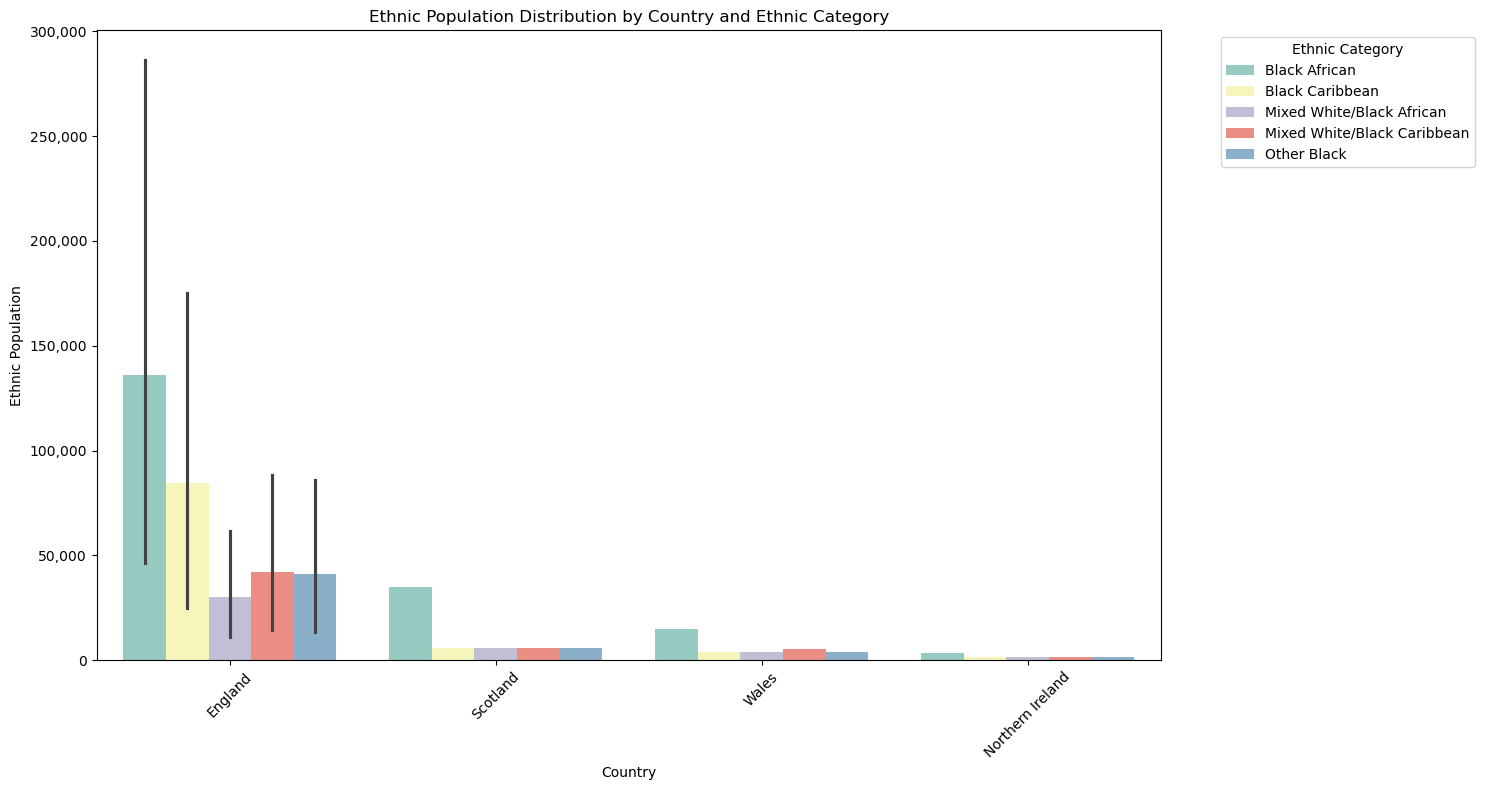

In [1291]:
# First, let's aggregate the data
ethnic_distribution = ethnic_population.groupby(['Country', 'Region', 'Ethnic Category'])['Ethnic Population'].sum().reset_index()

# Calculate total population per country for sorting
country_totals = ethnic_distribution.groupby('Country')['Ethnic Population'].sum().sort_values(ascending=False)
country_order = country_totals.index

# Create a figure
plt.figure(figsize=(15, 8))

# Create the grouped bar plot using seaborn with ordered countries
sns.barplot(data=ethnic_distribution,
            x='Country',
            y='Ethnic Population',
            hue='Ethnic Category',
            palette='Set3',
            order=country_order)  # Add this line to specify the order

# Customize the plot
plt.title('Ethnic Population Distribution by Country and Ethnic Category')
plt.xlabel('Country')
plt.ylabel('Ethnic Population')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title='Ethnic Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add comma separator to y-axis values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

Looking at the original table, the black vertical bars in the plot likely represent the variation in ethnic population numbers across different cities within each country. Since the data is grouped by country in the plot, but the original data has city-level information, the error bars show the spread of population values across different cities in each country.<br>

For example, in England, the data includes populations from multiple cities (like Greater London and others), so the error bars show how much these population numbers vary between cities. The larger error bars for England make sense because it likely has more cities with more varying population sizes compared to other countries in the dataset.<br>

This explains why England shows the largest error bars - it probably has the most cities and the biggest variations in ethnic populations between those cities. In contrast, countries like Northern Ireland, which might have fewer cities in the dataset, show smaller or minimal error bars because there's less city-to-city variation to display.

##### Key Insights:

Geographic Distribution:<br>
England shows significantly higher populations across all ethnic categories
Scotland has the second-largest populations, but significantly lower than England
Wales and Northern Ireland show relatively small ethnic populations
This aligns with known demographic patterns in the UK

Ethnic Category Patterns:<br>
Black African (mint green) represents the largest ethnic group in most countries
Black Caribbean (light yellow) is the second largest group, particularly in England
Mixed ethnicities (White/Black African and White/Black Caribbean) show similar proportions
"Other Black" category shows consistent presence across regions

Notable Observations:<br>
England's Black African population (~135,000) is substantially larger than other groups
England's Black Caribbean population (~85,000) forms a significant second group
Mixed ethnicity populations are more prevalent in England than other countries
Scotland shows a notable Black African population but much smaller than England
Wales and Northern Ireland show much smaller but still measurable ethnic populations

Proportional Distribution:<br>
England accounts for approximately 80-85% of the total ethnic population
The distribution pattern suggests concentrated urban settlements
Mixed ethnicity categories suggest established communities with intergenerational presence

***

##### FACTOR 2: INMIGRATION:

In [1342]:
immigration = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/inmigration_to_uk.csv')
immigration.head()

,Country,Ethnic group,Year of arrival in the UK,Population
0,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Does not apply,0
1,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Born in the UK,531383
2,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived before 1951,132
3,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived 1951 to 1960,1363
4,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived 1961 to 1970,7573


In [1343]:
immigration['Year of arrival in the UK'].unique()

array(['Does not apply', 'Born in the UK', 'Arrived before 1951',
       'Arrived 1951 to 1960', 'Arrived 1961 to 1970',
       'Arrived 1971 to 1980', 'Arrived 1981 to 1990',
       'Arrived 1991 to 2000', 'Arrived 2001 to 2010',
       'Arrived 2011 to 2013', 'Arrived 2014 to 2016',
       'Arrived 2017 to 2019', 'Arrived 2020 to 2021'], dtype=object)

In [1344]:
# Drop rows where the column equals 'Does not apply' or 'Born in the UK'
inmigration = immigration[~immigration['Year of arrival in the UK'].isin(['Does not apply', 'Born in the UK'])]

# Verify the unique values remaining in the column
print("Remaining arrival periods:")
print(immigration['Year of arrival in the UK'].unique())

Remaining arrival periods:
['Does not apply' 'Born in the UK' 'Arrived before 1951'
 'Arrived 1951 to 1960' 'Arrived 1961 to 1970' 'Arrived 1971 to 1980'
 'Arrived 1981 to 1990' 'Arrived 1991 to 2000' 'Arrived 2001 to 2010'
 'Arrived 2011 to 2013' 'Arrived 2014 to 2016' 'Arrived 2017 to 2019'
 'Arrived 2020 to 2021']


In [1345]:
# Create a dictionary mapping arrival periods to group numbers
arrival_groups = {
    'Arrived before 1951': 1,
    'Arrived 1951 to 1960': 2,
    'Arrived 1961 to 1970': 3,
    'Arrived 1971 to 1980': 4,
    'Arrived 1981 to 1990': 5,
    'Arrived 1991 to 2000': 6,
    'Arrived 2001 to 2010': 7,
    'Arrived 2011 to 2013': 8,
    'Arrived 2014 to 2016': 9,
    'Arrived 2017 to 2019': 10,
    'Arrived 2020 to 2021': 11
}

# Create new column with group numbers
immigration['Arrival_Group'] = immigration['Year of arrival in the UK'].map(arrival_groups)

# Verify the mapping
print("\nVerification of mapping:")
print(immigration[['Year of arrival in the UK', 'Arrival_Group']].drop_duplicates().sort_values('Arrival_Group'))


Verification of mapping:
   Year of arrival in the UK  Arrival_Group
2        Arrived before 1951            1.0
3       Arrived 1951 to 1960            2.0
4       Arrived 1961 to 1970            3.0
5       Arrived 1971 to 1980            4.0
6       Arrived 1981 to 1990            5.0
7       Arrived 1991 to 2000            6.0
8       Arrived 2001 to 2010            7.0
9       Arrived 2011 to 2013            8.0
10      Arrived 2014 to 2016            9.0
11      Arrived 2017 to 2019           10.0
12      Arrived 2020 to 2021           11.0
0             Does not apply            NaN
1             Born in the UK            NaN


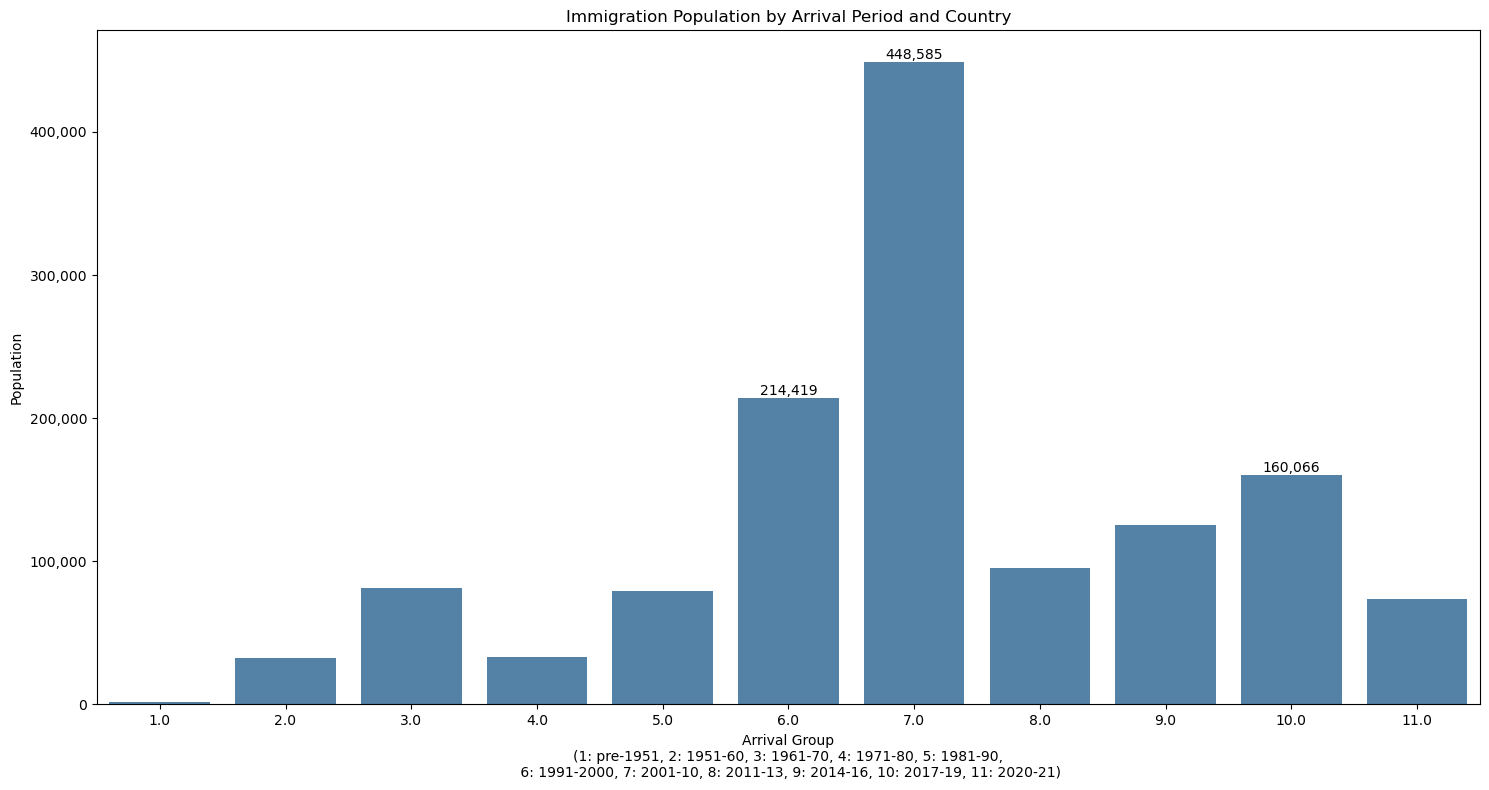

In [1346]:
# Aggregate population by arrival group and country
population_by_group = immigration.groupby(['Country', 'Arrival_Group'])['Population'].sum().reset_index()

# Create the visualization
plt.figure(figsize=(15, 8))

# Create grouped bar plot
ax = sns.barplot(data=population_by_group, 
                x='Arrival_Group', 
                y='Population',
                color='steelblue')

# Add values for top 3 bars
top_3_groups = population_by_group.nlargest(3, 'Population')
for idx in top_3_groups.index:
    value = top_3_groups.loc[idx, 'Population']
    group = top_3_groups.loc[idx, 'Arrival_Group']
    plt.text(group-1, value, f'{value:,.0f}', 
             ha='center', va='bottom')

# Customize the plot
plt.title('Immigration Population by Arrival Period and Country')
plt.xlabel('Arrival Group\n(1: pre-1951, 2: 1951-60, 3: 1961-70, 4: 1971-80, 5: 1981-90,\n 6: 1991-2000, 7: 2001-10, 8: 2011-13, 9: 2014-16, 10: 2017-19, 11: 2020-21)')
plt.ylabel('Population')

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

##### Key Insights:

Peak Immigration Period:<br>
Group 7 (2001-2010) shows the highest immigration numbers with 448,585 arrivals
This represents a significant spike compared to all other periods
Suggests major immigration policy changes or global events influencing migration patterns

Secondary Peak:<br>
Group 6 (1991-2000) shows the second-highest numbers with 214,419 arrivals
Indicates a building trend that led to the 2001-2010 peak
Represents a significant increase from previous decades

Recent Trends:<br>
Group 10 (2017-2019) shows a notable population of 160,066 immigrants
Recent periods maintain relatively high numbers compared to pre-1990 periods
Suggests sustained immigration levels in recent years

Historical Pattern:<br>
Groups 1-5 (pre-1951 through 1990) show consistently lower numbers
Early periods (Groups 1-2) show minimal immigration
Gradual increase through Groups 3-5, but still significantly lower than recent periods

Temporal Evolution:<br>
Clear upward trend from 1951 to 2010
Post-2010 shows a decrease from the peak but maintains higher levels than pre-1990
Most recent period (Group 11, 2020-2021) shows lower numbers, possibly due to COVID-19 pandemic

##### Age ranges for the top 3 immigration groups as of 2024:

- Group 7 (2001-2010) - 448,585 people:<br>
Arrived 14-23 years ago

    If they arrived as:<br>
    Young adults (20-30): Now 34-53 years old<br>
    Middle-aged (31-50): Now 45-73 years old<br>
    Children (under 18): Now 18-41 years old<br>
    This represents likely the most economically active group currently<br>
    Many would have established families and careers in the UK<br>

- Group 6 (1991-2000) - 214,419 people:<br>
    Arrived 24-33 years ago<br>

    If they arrived as:<br>
    Young adults (20-30): Now 44-63 years old<br>
    Middle-aged (31-50): Now 55-83 years old<br>
    Children (under 18): Now 28-51 years old<br>
    Many in this group would be in senior career positions or approaching retirement<br>
    Likely to have well-established community ties<br>

- Group 10 (2017-2019) - 160,066 people:<br>
    Arrived 5-7 years ago<br>

    If they arrived as:<br>
    Young adults (20-30): Now 25-37 years old<br>
    Middle-aged (31-50): Now 36-57 years old<br>
    Children (under 18): Now 5-25 years old<br>
    Represents the most recently established significant group<br>
    Likely still in period of career development and community integration<br>
    Includes young families and professionals<br>

***

##### FACTOR 3: CLINICAL TRIALS: 
- The approximate number of individuals in each city who are eligible to participate in the Inaxaplin clinical trial. This population is generally made up of individuals with kidney disease associated with the APOL1 genetic variants, which are prevalent in people of African and Caribbean descent.

##### Inaxaplin (formerly known as VX-147) is a drug developed by Vertex Pharmaceuticals, primarily intended for treating APOL1-mediated focal segmental glomerulosclerosis (FSGS), a kidney disease caused by mutations in the APOL1 gene.

##### The JUSTICE clinical trial is designed to evaluate whether baricitinib, a Janus kinase (JAK) inhibitor, can slow the progression of kidney disease associated with APOL1 gene variants. APOL1 gene variants are linked to certain kidney diseases, including Focal Segmental Glomerulosclerosis (FSGS) and hypertension-associated chronic kidney disease (HTN-CKD).

In [1292]:
# read the dataset
clinical_trials = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/clinical_trials.csv')
clinical_trials.head()

,City,Region,Target Population - Inaxaplin,Target Population - JUSTICE,Clinical Trial Name,Clinical Trial Type
0,London,Greater London,"500-1,000","500-1,000","Inaxaplin, JUSTICE",Both
1,Manchester,North West England,300-700,200-500,"Inaxaplin, JUSTICE",Both
2,Birmingham,West Midlands,400-800,300-600,"Inaxaplin, JUSTICE",Both
3,Leeds,Yorkshire and the Humber,250-500,150-400,"Inaxaplin, JUSTICE",Both
4,Liverpool,North West England,300-600,200-400,"Inaxaplin, JUSTICE",Both


In [1293]:
# check data types and data inconsistency
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   City                           15 non-null     object
 1   Region                         15 non-null     object
 2   Target Population - Inaxaplin  15 non-null     object
 3   Target Population - JUSTICE    15 non-null     object
 4   Clinical Trial Name            15 non-null     object
 5   Clinical Trial Type            15 non-null     object
dtypes: object(6)
memory usage: 852.0+ bytes


In [1294]:
# Strip any leading/trailing spaces from column names (just in case)
clinical_trials.columns = clinical_trials.columns.str.strip()

# Function to split the population range into minimum and maximum values
def split_population_range(pop_range):
    # Remove commas (if any) and split by '-'
    pop_range = pop_range.replace(',', '')
    min_val, max_val = pop_range.split('-')
    
    # Convert to integers
    return int(min_val), int(max_val)

# Apply the function to split the 'Target Population' columns
clinical_trials[['Inaxaplin_min', 'Inaxaplin_max']] = clinical_trials['Target Population - Inaxaplin'].apply(lambda x: pd.Series(split_population_range(x)))
clinical_trials[['JUSTICE_min', 'JUSTICE_max']] = clinical_trials['Target Population - JUSTICE'].apply(lambda x: pd.Series(split_population_range(x)))

# Convert the new columns into integer type (if not already)
clinical_trials[['Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']] = clinical_trials[['Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']].astype(int)

# Reset the index if needed (this may resolve the indexing issue)
clinical_trials.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(clinical_trials[['City', 'Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']])

          City  Inaxaplin_min  Inaxaplin_max  JUSTICE_min  JUSTICE_max
0       London            500           1000          500         1000
1   Manchester            300            700          200          500
2   Birmingham            400            800          300          600
3        Leeds            250            500          150          400
4    Liverpool            300            600          200          400
5      Bristol            200            400          100          300
6    Sheffield            250            500          150          400
7   Nottingham            200            400          100          300
8      Glasgow            150            300          100          250
9    Edinburgh            100            250           50          150
10     Cardiff            100            200           50          150
11   Newcastle            100            300           50          150
12    Coventry            150            300          100          200
13    

In [1295]:
clinical_trials.describe()

,Inaxaplin_min,Inaxaplin_max,JUSTICE_min,JUSTICE_max
count,15.000000,15.000000,15.000000,15.000000
mean,216.666667,450.000000,146.666667,343.333333
std,119.023807,235.280987,120.218056,229.024848
min,100.000000,200.000000,50.000000,150.000000
25%,125.000000,300.000000,75.000000,175.000000
50%,200.000000,400.000000,100.000000,300.000000
75%,275.000000,550.000000,175.000000,400.000000
max,500.000000,1000.000000,500.000000,1000.000000


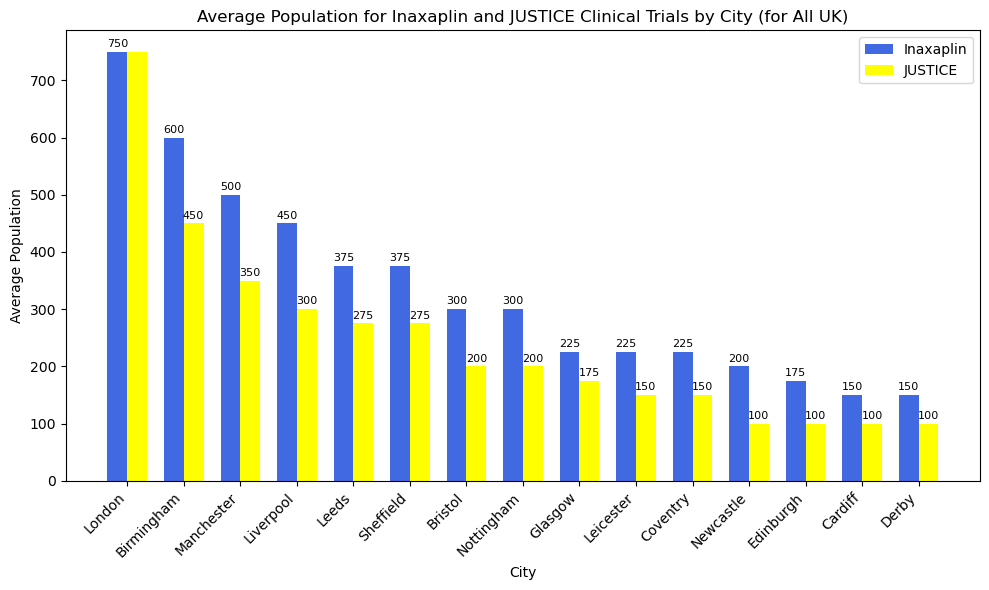

In [1296]:
# Calculate the average population for Inaxaplin and JUSTICE
clinical_trials['Inaxaplin_avg'] = (clinical_trials['Inaxaplin_min'] + clinical_trials['Inaxaplin_max']) / 2
clinical_trials['JUSTICE_avg'] = (clinical_trials['JUSTICE_min'] + clinical_trials['JUSTICE_max']) / 2

# Sort the DataFrame by the average population (Inaxaplin + JUSTICE) in descending order
clinical_trials['Total_avg'] = clinical_trials['Inaxaplin_avg'] + clinical_trials['JUSTICE_avg']
clinical_trials = clinical_trials.sort_values(by='Total_avg', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Position of the bars
bar_width = 0.35
index = range(len(clinical_trials))

# Create combined bar chart
plt.bar(index, clinical_trials['Inaxaplin_avg'], width=bar_width, color='royalblue', label='Inaxaplin')
plt.bar([i + bar_width for i in index], clinical_trials['JUSTICE_avg'], width=bar_width, color='yellow', label='JUSTICE')

# Add the value labels on top of the bars, closer to the bars
for i, (inaxaplin_value, justice_value) in enumerate(zip(clinical_trials['Inaxaplin_avg'], clinical_trials['JUSTICE_avg'])):
    # Display only one value when both values are the same
    if inaxaplin_value == justice_value:
        plt.text(i, inaxaplin_value + 5, f'{inaxaplin_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)
    else:
        plt.text(i, inaxaplin_value + 5, f'{inaxaplin_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)  # Inaxaplin label
        plt.text(i + bar_width, justice_value + 5, f'{justice_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)  # JUSTICE label

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Average Population')
plt.title('Average Population for Inaxaplin and JUSTICE Clinical Trials by City (for All UK)')
plt.xticks([i + bar_width / 2 for i in index], clinical_trials['City'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### This chart shows a key difference in the types of cities used in the Inaxaplin and JUSTICE drug trials.  Inaxaplin primarily focused on much larger cities, while JUSTICE included smaller ones.  This difference matters because city size can influence how patients receive healthcare and their overall health.  

The numbers confirm what we see visually: Inaxaplin's average city size was significantly bigger than JUSTICE's.  This raises a question: would the drugs work the same way for people in smaller towns versus big cities?  Because of this difference, we need to be cautious when comparing the results of the two trials directly.  It also means that future studies should try to include a mix of city sizes to ensure the findings apply to everyone, not just those living in large urban areas.


***

##### FACTOR 4: CORRELATED DISEASES WITH APOL1 IN HIGHEST RISK CITIES FOR THE 3 HIGHESTS COUNTRIES WITH ETHNIC POPULATION IN THE UK.

### England

##### Correlated Diseases in England: The estimated cases affected by the correlated diseases with Apol1.

In [1297]:
correlated_disease_england = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_england.csv')

In [1298]:
correlated_disease_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Disease                                   32 non-null     object 
 1   Fold Increased Risk                       32 non-null     float64
 2   Risk Type                                 32 non-null     object 
 3   Condition/Context                         32 non-null     object 
 4   Prevalence Percentage                     32 non-null     object 
 5   Prevalence Percentage: Other Ethnicities  32 non-null     object 
 6   Confidence Levels for Prevalence Data     32 non-null     object 
 7   City                                      32 non-null     object 
 8   Region                                    32 non-null     object 
 9   Age Ranges                                32 non-null     object 
 10  Gender                                  

In [1299]:
# Remove % symbol and convert to float
correlated_disease_england['Prevalence Percentage'] = correlated_disease_england['Prevalence Percentage'].str.replace('%', '').astype(float)
correlated_disease_england.head()

,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Prevalence Percentage: Other Ethnicities,Confidence Levels for Prevalence Data,City,Region,Age Ranges,Gender,Estimated Cases
0,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),London,Greater London,20-50,All adults,4800
1,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),Birmingham,West Midlands,20-50,All adults,1200
2,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),Manchester,North West,20-50,All adults,850
3,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10.0,<0.1%,90% (88-92%),London,Greater London,All ages,All adults,86816
4,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10.0,<0.1%,90% (88-92%),Birmingham,West Midlands,All ages,All adults,9600


Text(0, 0.5, 'Disease')

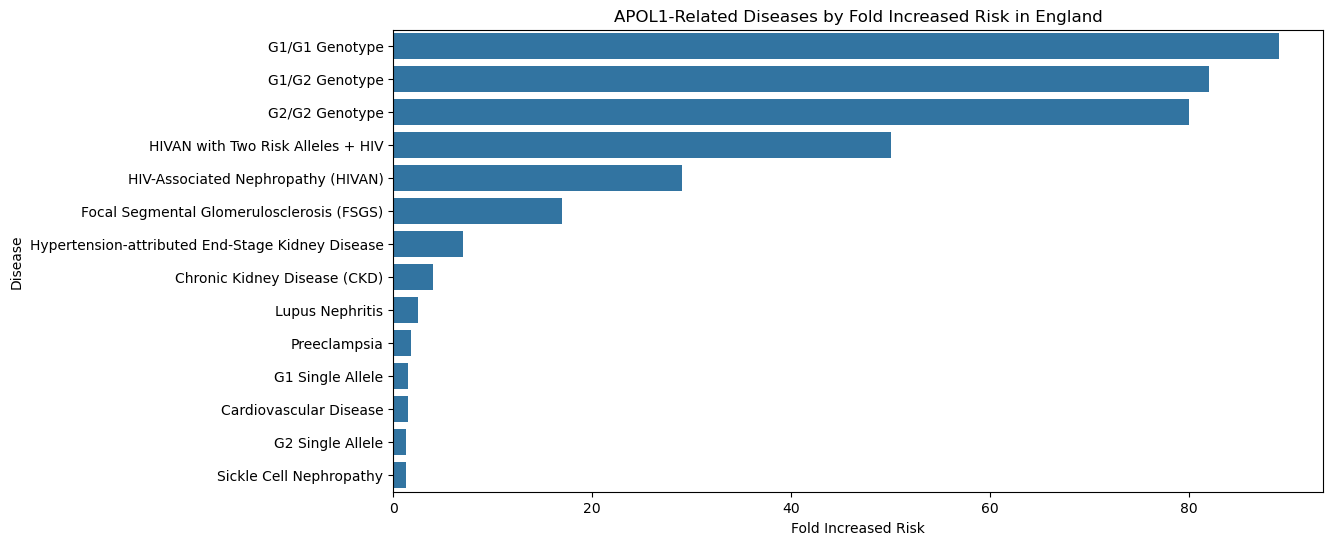

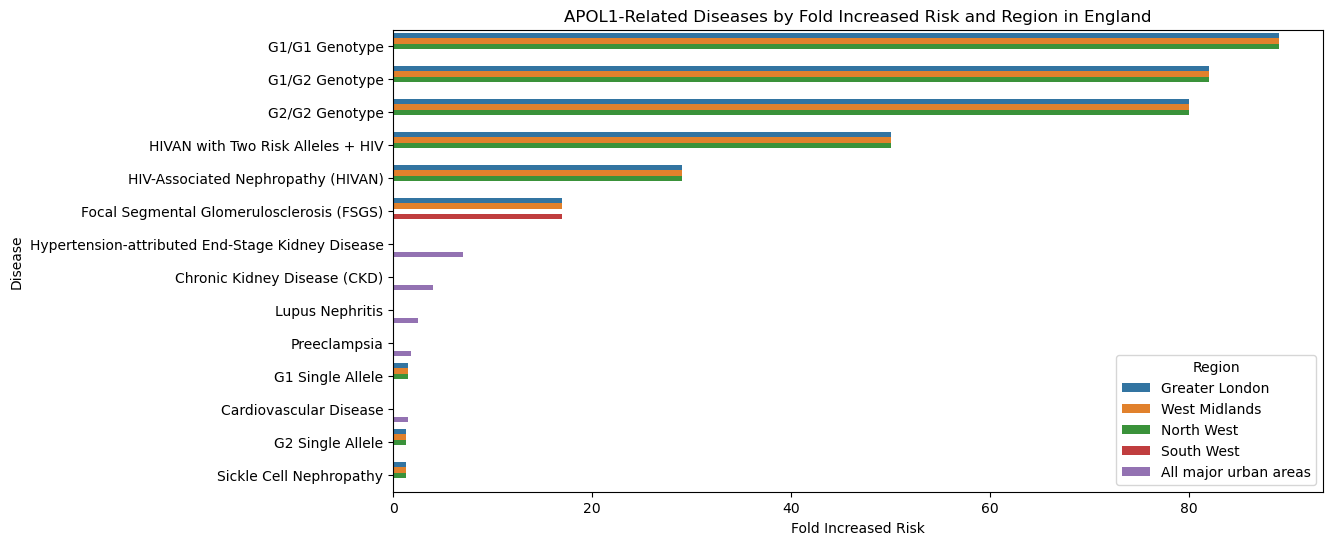

In [1300]:
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=correlated_disease_england, 
            x='Fold Increased Risk', 
            y='Disease',
            order=correlated_disease_england.sort_values('Fold Increased Risk', ascending=False)['Disease'])

# Add region labels or color coding
plt.title('APOL1-Related Diseases by Fold Increased Risk in England')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

# Alternative: Create a grouped bar chart showing regions
fig, ax = plt.subplots(figsize=(12, 6))
diseases_by_risk = correlated_disease_england.sort_values('Fold Increased Risk', ascending=False)

# Create color-coded bars by region
sns.barplot(data=diseases_by_risk,
           x='Fold Increased Risk',
           y='Disease',
           hue='Region')

plt.title('APOL1-Related Diseases by Fold Increased Risk and Region in England')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

##### I will take the Regions with over 50% fold increased risk percentage regions.

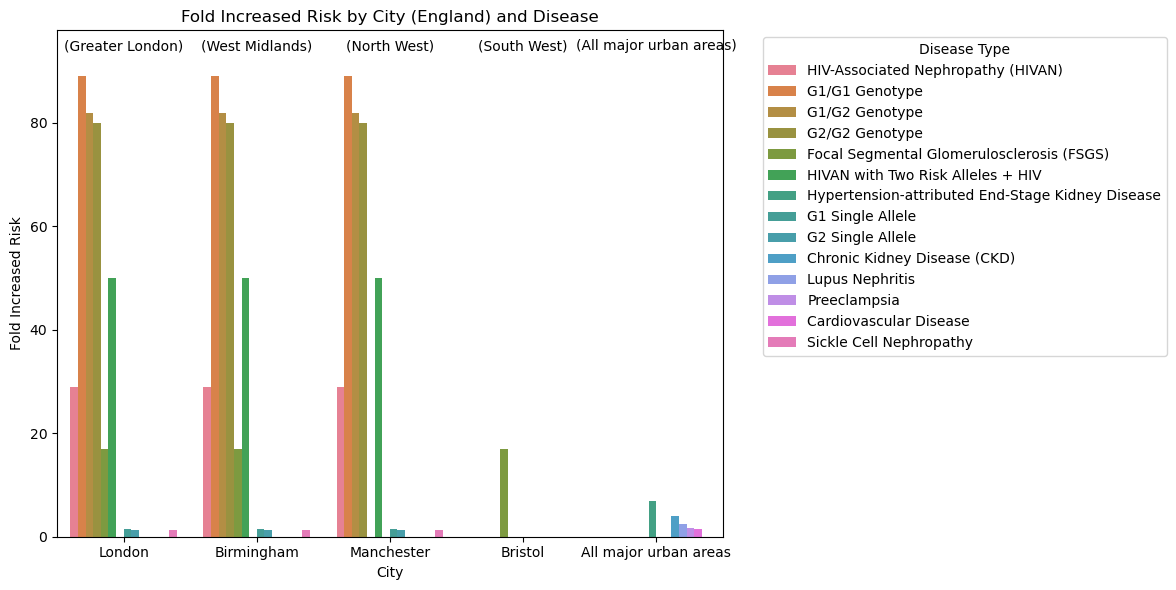

In [1301]:
# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
bars = sns.barplot(data=correlated_disease_england, 
                  x='City', 
                  y='Fold Increased Risk',
                  hue='Disease',  # Color bars by disease type
                  order=['London', 'Birmingham', 'Manchester', 'Bristol', 'All major urban areas'])  # Specify order

# Add region labels above the bars
for i, city in enumerate(['London', 'Birmingham', 'Manchester', 'Bristol', 'All major urban areas']):
    region = correlated_disease_england[correlated_disease_england['City'] == city]['Region'].iloc[0]
    plt.text(i, plt.ylim()[1], f'({region})',
             ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Fold Increased Risk by City (England) and Disease')
plt.xlabel('City')
plt.ylabel('Fold Increased Risk')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add some padding at the top for region labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()
plt.show()

##### Key Insights:

Geographic Distribution:<br>
The three major cities (London, Birmingham, and Manchester) show remarkably similar risk patterns.<br>
These cities, representing different regions (Greater London, West Midlands, and North West), have nearly identical risk profiles for most diseases.<br>
Bristol (South West) shows significantly lower risk levels, with fewer disease types present.<br>

Disease Pattern Analysis:<br>
G1/G1 Genotype shows the highest risk (around 89-fold increase) consistently across London, Birmingham, and Manchester.<br>
G1/G2 and G2/G2 Genotypes follow as the second highest risk factors (approximately 80-fold increase).<br>
HIVAN with Two Risk Alleles + HIV shows moderate risk levels (about 50-fold increase).<br>
HIV-Associated Nephropathy (HIVAN) maintains a consistent risk level (around 29-fold increase) across the three major cities.<br>

Risk Level Stratification:<br>
High Risk (>80-fold): Genetic variants (G1/G1, G1/G2, G2/G2 Genotypes).<br>
Medium Risk (30-50 fold): HIVAN with Two Risk Alleles + HIV.<br>
Lower Risk (<30 fold): Basic HIVAN and other conditions.<br>

Urban vs. Overall Comparison:<br>
Major urban areas show significantly higher risk levels compared to the national average.<br>
The "All major urban areas" category shows lower overall risk levels, suggesting the concentration of risk factors in specific cities.<br>

Conclusions:<br>
There's a clear urban concentration of APOL1-related disease risks.<br>
Genetic variants pose the highest risks across all major cities.<br>
The consistency of risk patterns across different regions suggests similar underlying demographic or healthcare factors.<br>
The significant drop in risk levels in Bristol and overall urban areas indicates that these conditions might be more prevalent in specific urban populations.<br>

***

In [1302]:
correlated_disease_london = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_london.csv')
correlated_disease_birmingham = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_birmingham.csv')
correlated_disease_manchester = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_manchester.csv')

In [1303]:
# Delete specified columns
columns_to_drop = ['Prevalence Percentage: Other Ethnicities', 'City', 'Region', 'Age Ranges', 'Gender']

# Drop the columns (using try-except in case some columns don't exist)
for column in columns_to_drop:
    try:
        correlated_disease_london = correlated_disease_london.drop(column, axis=1)
    except KeyError:
        print(f"Column '{column}' not found in the dataset")

# Save the modified dataframe back to CSV
correlated_disease_london.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_london.csv', index=False)

# Rename columns
correlated_disease_birmingham.rename(columns={'High Prevalence Areas': 'High Prevalence Boroughs'}, inplace=True)

Column 'Prevalence Percentage: Other Ethnicities' not found in the dataset
Column 'City' not found in the dataset
Column 'Region' not found in the dataset
Column 'Age Ranges' not found in the dataset
Column 'Gender' not found in the dataset


In [1304]:
#Add a 'City' column to each dataframe
correlated_disease_london['City'] = 'London'
correlated_disease_birmingham['City'] = 'Birmingham'
correlated_disease_manchester['City'] = 'Manchester'

# Rename the column
correlated_disease_manchester.rename(columns={'High Prevalence Areas': 'High Prevalence Boroughs'}, inplace=True)

# Combine all dataframes into one
combined_df = pd.concat([correlated_disease_london, correlated_disease_birmingham, correlated_disease_manchester], ignore_index=True)

# Reorder columns to have 'City' as the first column (optional)
# Get all column names
cols = combined_df.columns.tolist()
# Remove 'City' from the list and add it at the beginning
cols.remove('City')
cols = ['City'] + cols

# Reorder the columns
combined_df = combined_df[cols]

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_england.csv', index=False)

correlated_disease_cities_england = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_england.csv')
correlated_disease_cities_england.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels for Prevalence Data,Estimated Cases,High Prevalence Boroughs,Confidence Levels
0,London,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12%,95% (93-97%),4800,Southwark,NaN
1,London,G1/G1 Genotype,85.0,Genetic,(leave blank if no specific context),9%,90% (88-92%),86816,Lambeth,NaN
2,London,G2/G2 Genotype,80.0,Genetic,(leave blank if no specific context),5%,90% (86-94%),69453,Newham,NaN
3,London,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,4%,85% (82-88%),34726,Hackney,NaN
4,London,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,3%,80% (75-85%)*,2400,Greenwich,NaN


In [1305]:
# Remove % symbol and convert to float
correlated_disease_cities_england['Prevalence Percentage'] = correlated_disease_cities_england['Prevalence Percentage'].str.replace('%', '').astype(float)
correlated_disease_cities_england.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels for Prevalence Data,Estimated Cases,High Prevalence Boroughs,Confidence Levels
0,London,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,95% (93-97%),4800,Southwark,NaN
1,London,G1/G1 Genotype,85.0,Genetic,(leave blank if no specific context),9.0,90% (88-92%),86816,Lambeth,NaN
2,London,G2/G2 Genotype,80.0,Genetic,(leave blank if no specific context),5.0,90% (86-94%),69453,Newham,NaN
3,London,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,4.0,85% (82-88%),34726,Hackney,NaN
4,London,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,3.0,80% (75-85%)*,2400,Greenwich,NaN


In [1306]:
correlated_disease_cities_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   City                                   39 non-null     object 
 1   Disease                                39 non-null     object 
 2   Fold Increased Risk                    39 non-null     float64
 3   Risk Type                              39 non-null     object 
 4   Condition/Context                      39 non-null     object 
 5   Prevalence Percentage                  39 non-null     float64
 6   Confidence Levels for Prevalence Data  13 non-null     object 
 7   Estimated Cases                        39 non-null     int64  
 8   High Prevalence Boroughs               39 non-null     object 
 9   Confidence Levels                      26 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.2+ KB


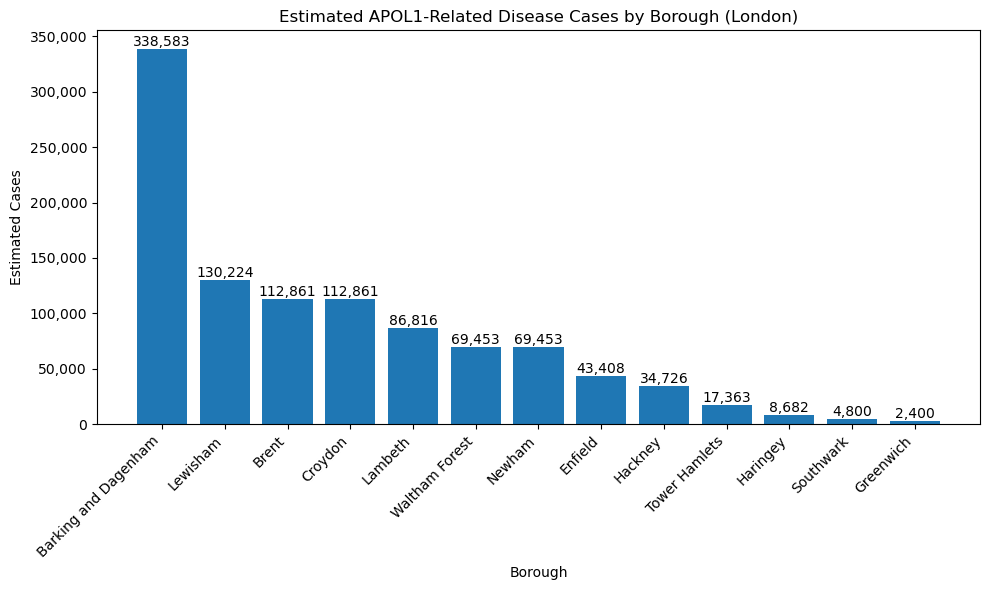

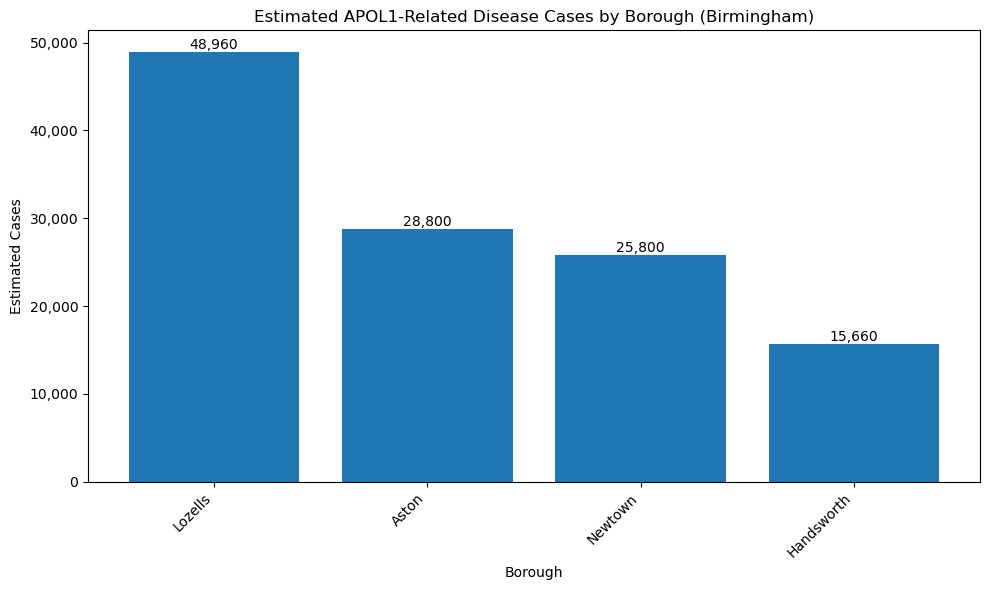

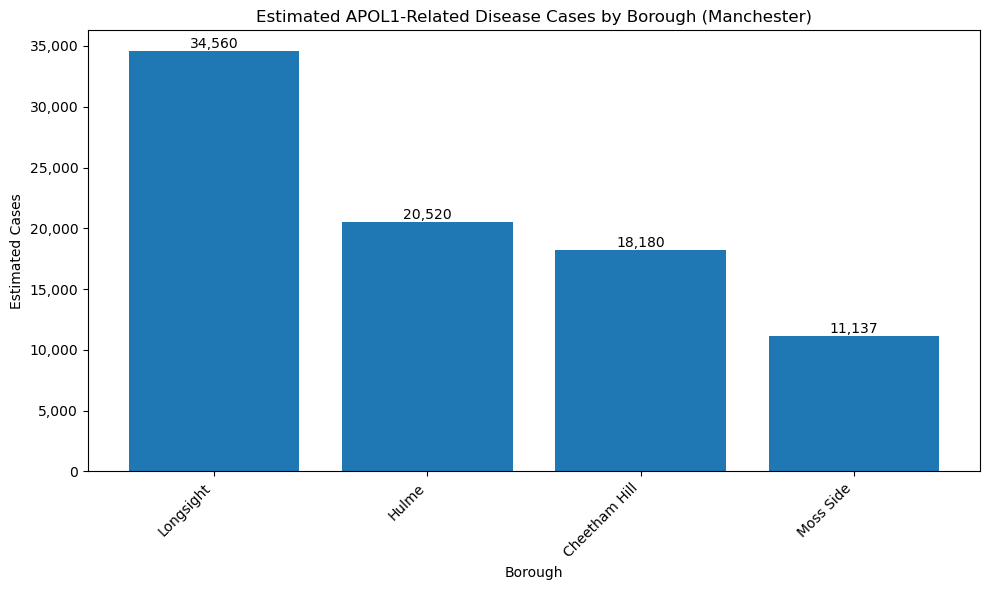

In [1307]:
def create_city_plot(data, city):
    """
    Create a bar plot for a specific city's disease cases by borough
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Group data by borough and sum the estimated cases
    df_aggregated = data.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort aggregated data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated APOL1-Related Disease Cases by Borough ({city})')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['London', 'Birmingham', 'Manchester']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_england[correlated_disease_cities_england['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
            
        # Create the plot
        create_city_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

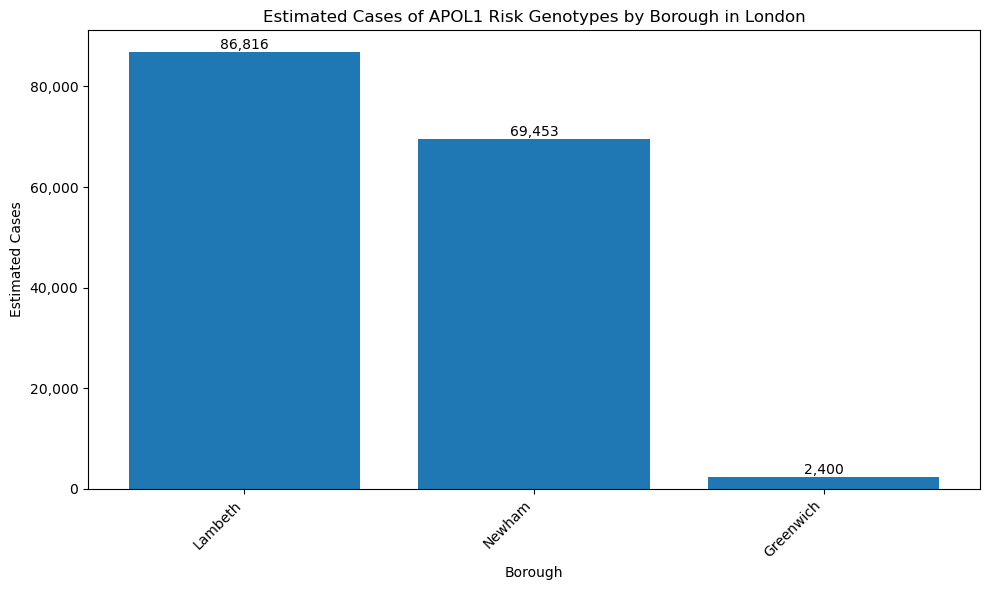

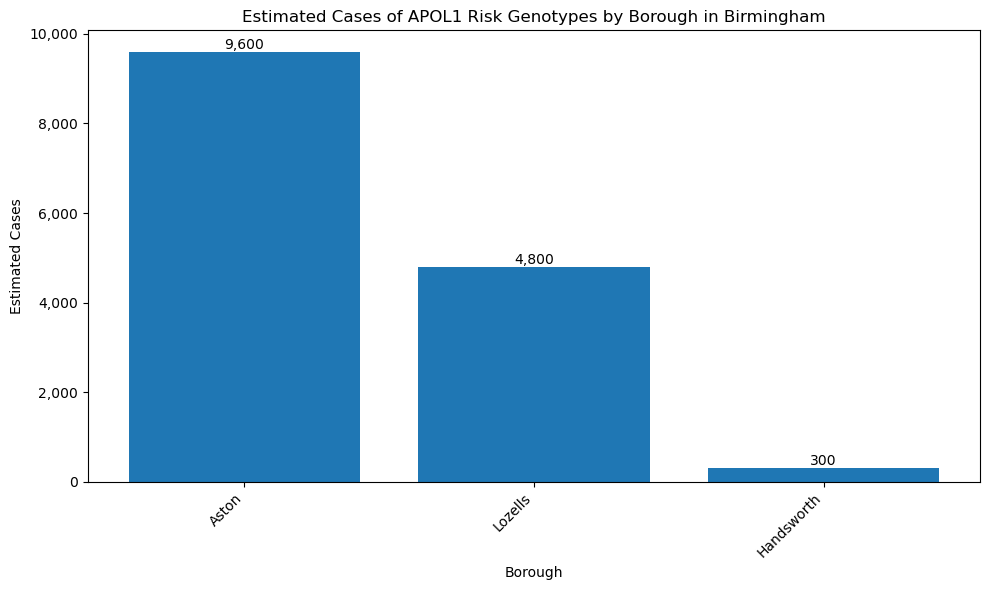

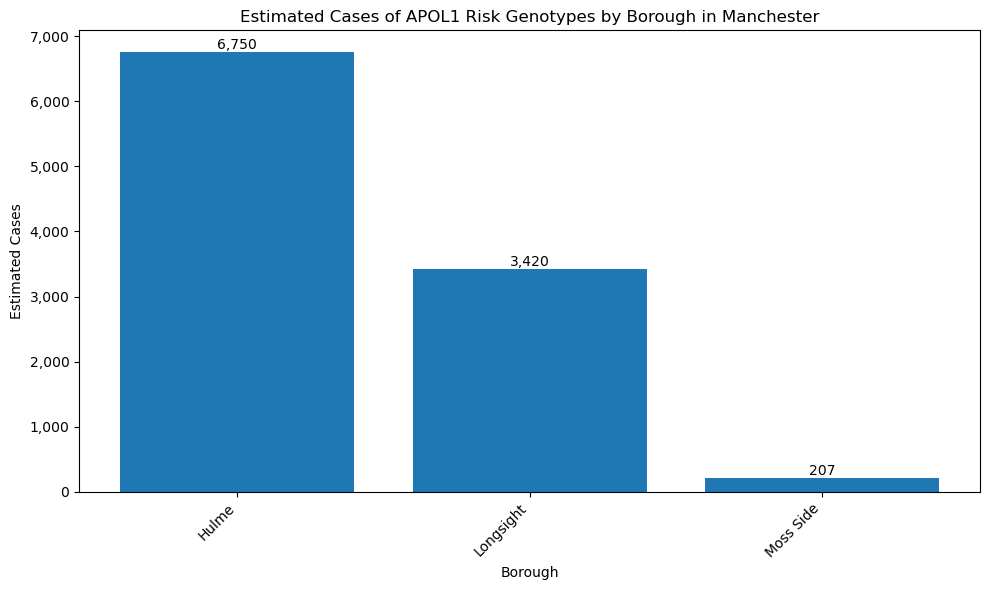

In [1308]:
def create_genotype_plot(data, city):
    """
    Create a bar plot for APOL1 risk genotypes by borough for a specific city
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Filter for specific conditions
    selected_conditions = [
        'G1/G1 Genotype',
        'G1/G2 Genotype', 
        'G2/G2 Genotype',
        'HIVAN with Two Risk Alleles + HIV'
    ]
    
    # Filter dataframe
    df_filtered = data[data['Disease'].isin(selected_conditions)]
    
    # Group and sum the filtered data
    df_aggregated = df_filtered.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated Cases of APOL1 Risk Genotypes by Borough in {city}')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['London', 'Birmingham', 'Manchester']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_england[correlated_disease_cities_england['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
        
        # Create the plot
        create_genotype_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

***

### Scotland

In [1309]:
correlated_disease_scotland = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_scotland.csv')

Text(0, 0.5, 'Disease')

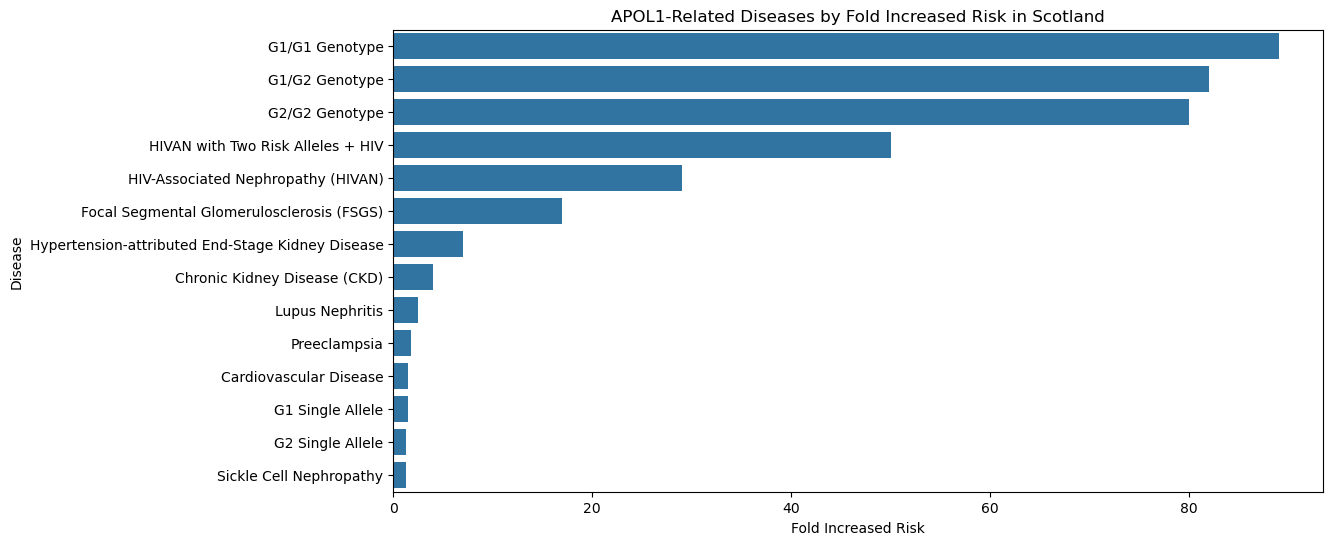

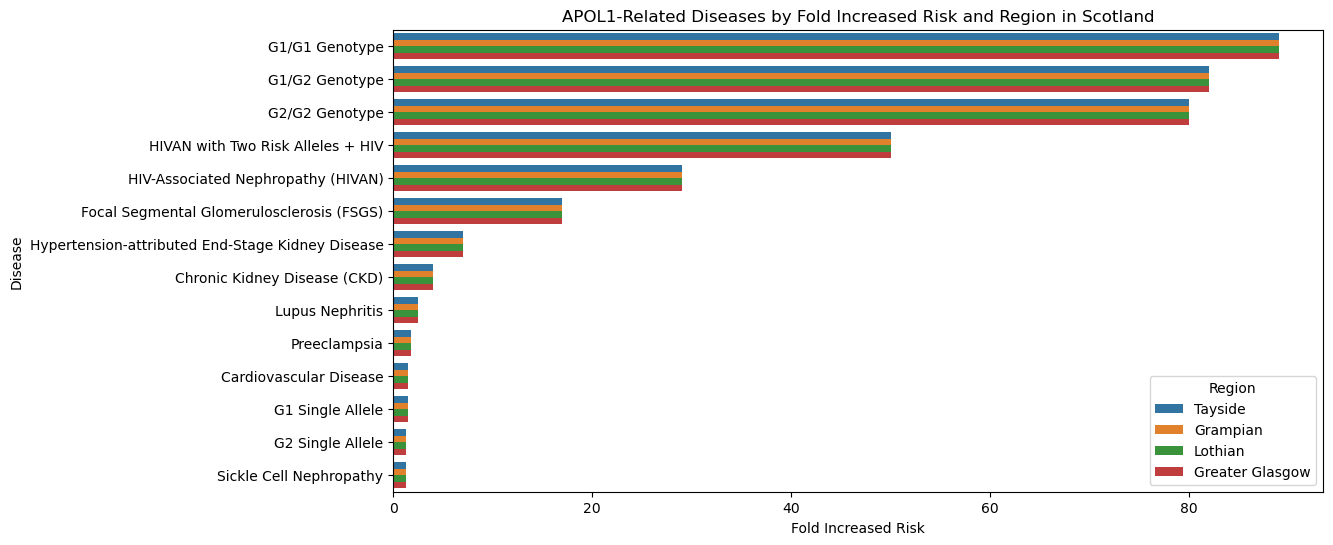

In [1310]:
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=correlated_disease_scotland, 
            x='Fold Increased Risk', 
            y='Disease',
            order=correlated_disease_scotland.sort_values('Fold Increased Risk', ascending=False)['Disease'])

# Add region labels or color coding
plt.title('APOL1-Related Diseases by Fold Increased Risk in Scotland')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

# Alternative: Create a grouped bar chart showing regions
fig, ax = plt.subplots(figsize=(12, 6))
diseases_by_risk = correlated_disease_scotland.sort_values('Fold Increased Risk', ascending=False)

# Create color-coded bars by region
sns.barplot(data=diseases_by_risk,
           x='Fold Increased Risk',
           y='Disease',
           hue='Region')

plt.title('APOL1-Related Diseases by Fold Increased Risk and Region in Scotland')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

##### I will take the Regions with over 50% fold increased risk percentage regions.

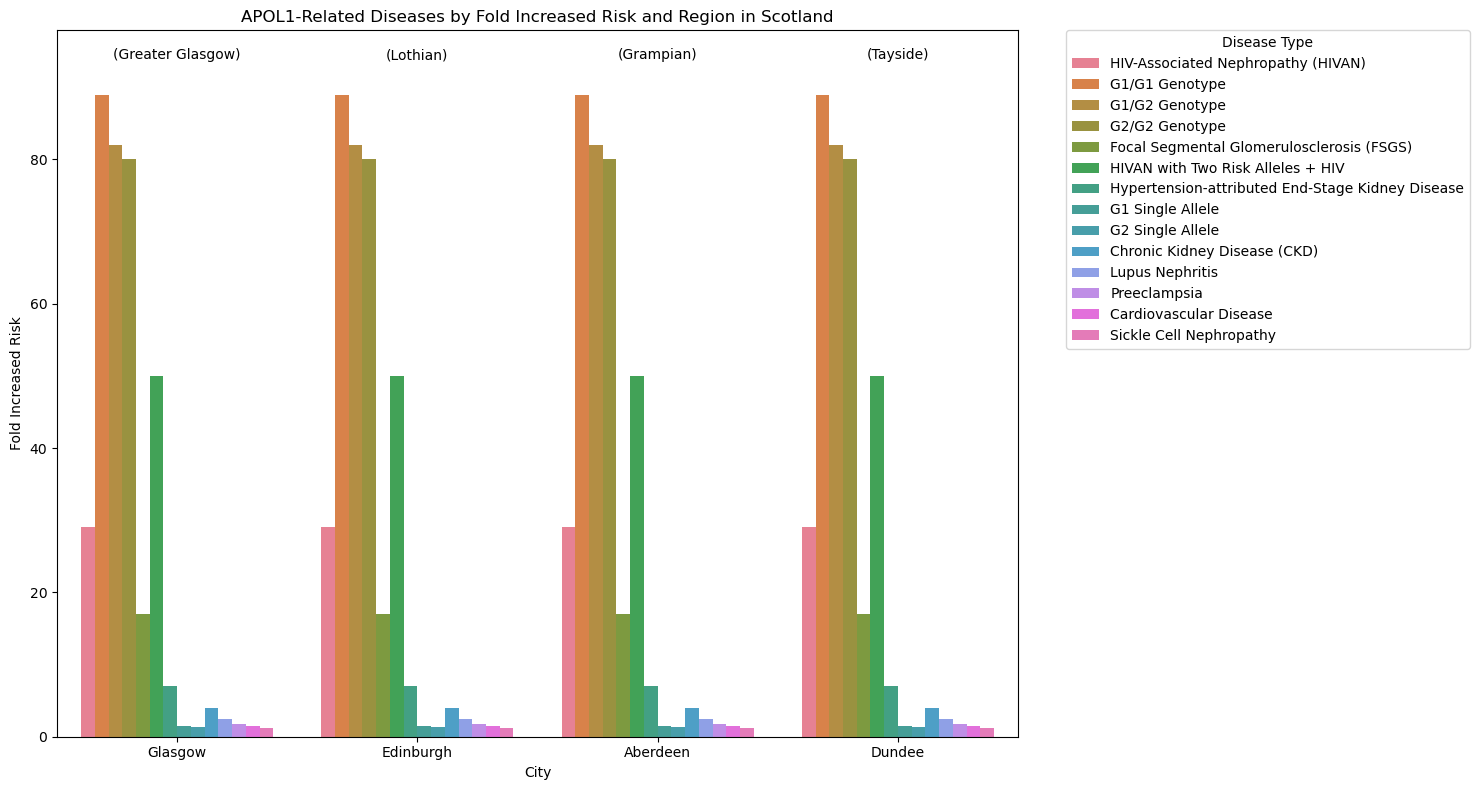

In [1311]:
# Calculate total risk by city and region
city_risk = correlated_disease_scotland.groupby(['City', 'Region'])['Fold Increased Risk'].sum().reset_index()

# Define the cities in order of regions shown in the original plot
top_cities = ['Glasgow', 'Edinburgh', 'Aberdeen', 'Dundee']  # Order matching the regions: Greater Glasgow, Lothian, Grampian, Tayside

# Create figure with larger size for better visibility
plt.figure(figsize=(15, 8))

# Create bar plot with adjusted parameters
bars = sns.barplot(data=correlated_disease_scotland[correlated_disease_scotland['City'].isin(top_cities)], 
                  x='City', 
                  y='Fold Increased Risk',
                  hue='Disease',  
                  order=top_cities,
                  width=0.8)  # Adjust bar width

# Add region labels above the bars
region_map = {
    'Glasgow': 'Greater Glasgow',
    'Edinburgh': 'Lothian',
    'Aberdeen': 'Grampian',
    'Dundee': 'Tayside'
}

# Add region labels with adjusted position
for i, city in enumerate(top_cities):
    region = region_map[city]
    plt.text(i, plt.ylim()[1], f'({region})',
             ha='center', va='bottom', fontsize=10)

# Filter for diseases with highest fold increased risk
high_risk_diseases = [
    'G1/G1 Genotype',
    'G1/G2 Genotype', 
    'G2/G2 Genotype',
    'HIVAN with Two Risk Alleles + HIV'
]

# Customize the plot
plt.title('APOL1-Related Diseases by Fold Increased Risk and Region in Scotland')
plt.xlabel('City')
plt.ylabel('Fold Increased Risk')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend position and size
plt.legend(title='Disease Type', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          borderaxespad=0)

# Add some padding at the top for region labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()

plt.show()

##### Correlated Diseases in Glasgow: The estimated cases affected by the correlated diseases with Apol1 in Glasgow.

In [1312]:
correlated_disease_glasgow = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_glasgow.csv')
correlated_disease_edimburgh = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_edimburgh.csv')
correlated_disease_aberdeen = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_aberdeen.csv')
correlated_disease_dundee = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_dundee.csv')

In [1313]:
#Add a 'City' column to each dataframe
correlated_disease_glasgow['City'] = 'Glasgow'
correlated_disease_edimburgh['City'] = 'Edimburgh'
correlated_disease_aberdeen['City'] = 'Aberdeen'
correlated_disease_dundee['City'] = 'Dundee'

# Combine all dataframes into one
combined_df = pd.concat([correlated_disease_glasgow, correlated_disease_edimburgh, correlated_disease_aberdeen, correlated_disease_dundee], ignore_index=True)

# Reorder columns to have 'City' as the first column (optional)
# Get all column names
cols = combined_df.columns.tolist()
# Remove 'City' from the list and add it at the beginning
cols.remove('City')
cols = ['City'] + cols

# Reorder the columns
combined_df = combined_df[cols]

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_scotland.csv', index=False)

correlated_disease_cities_scotland = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_scotland.csv')
correlated_disease_cities_scotland.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels,Estimated Cases,High Prevalence Boroughs
0,Glasgow,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,10.0,92% (90-94%),570,Pollokshields
1,Glasgow,G1/G1 Genotype,89.0,Genetic,African ancestry,9.0,88% (86-90%),1905,Pollokshields
2,Glasgow,G2/G2 Genotype,80.0,Genetic,African ancestry,4.0,85% (82-88%),952,Pollokshields
3,Glasgow,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,3.5,85% (82-88%),667,Govanhill
4,Glasgow,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,2.5,80% (75-85%)*,476,Govanhill


In [1314]:
correlated_disease_cities_scotland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      52 non-null     object 
 1   Disease                   52 non-null     object 
 2   Fold Increased Risk       52 non-null     float64
 3   Risk Type                 52 non-null     object 
 4   Condition/Context         52 non-null     object 
 5   Prevalence Percentage     52 non-null     float64
 6   Confidence Levels         52 non-null     object 
 7   Estimated Cases           52 non-null     int64  
 8   High Prevalence Boroughs  52 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.8+ KB


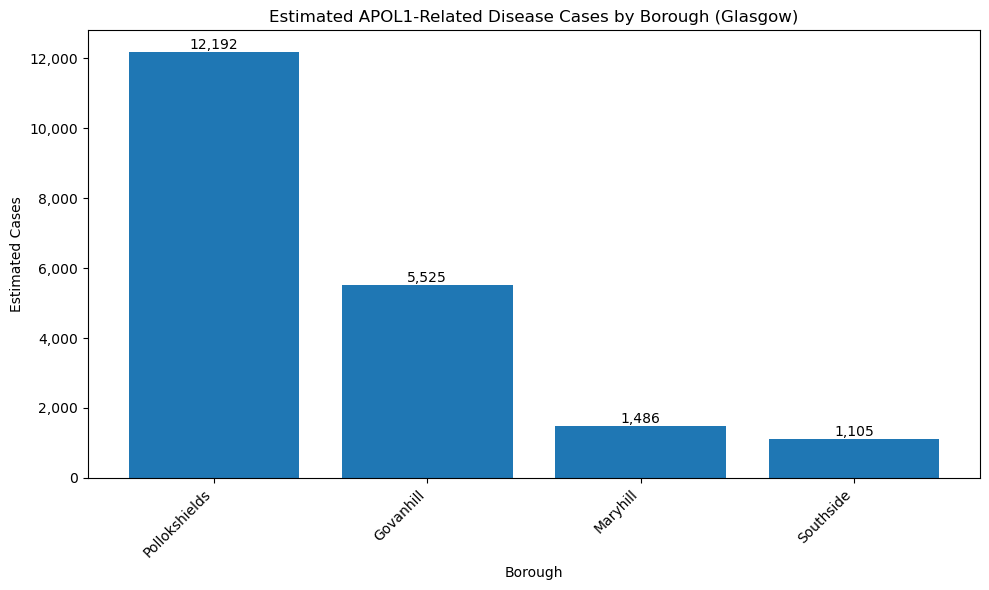

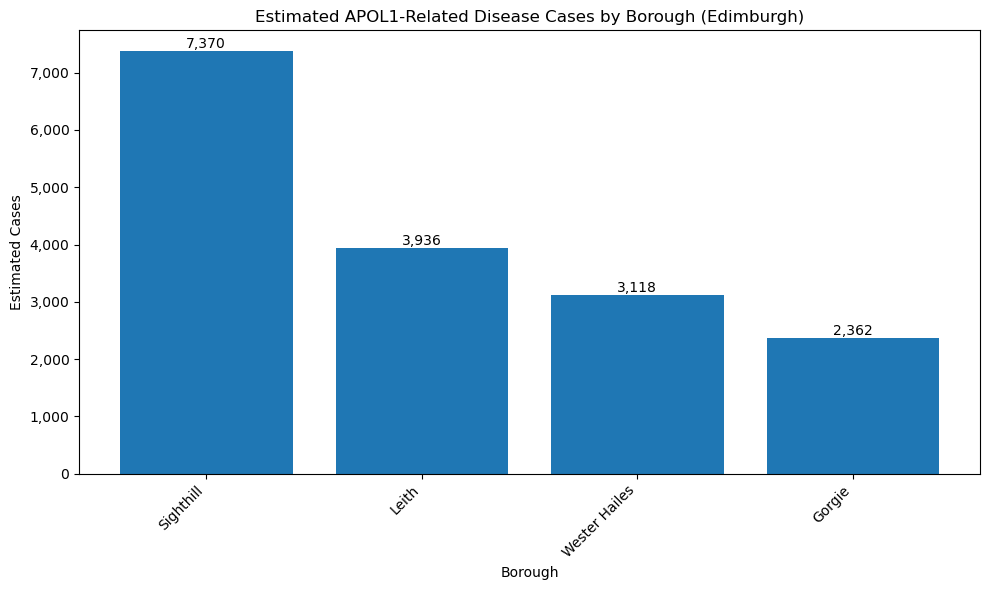

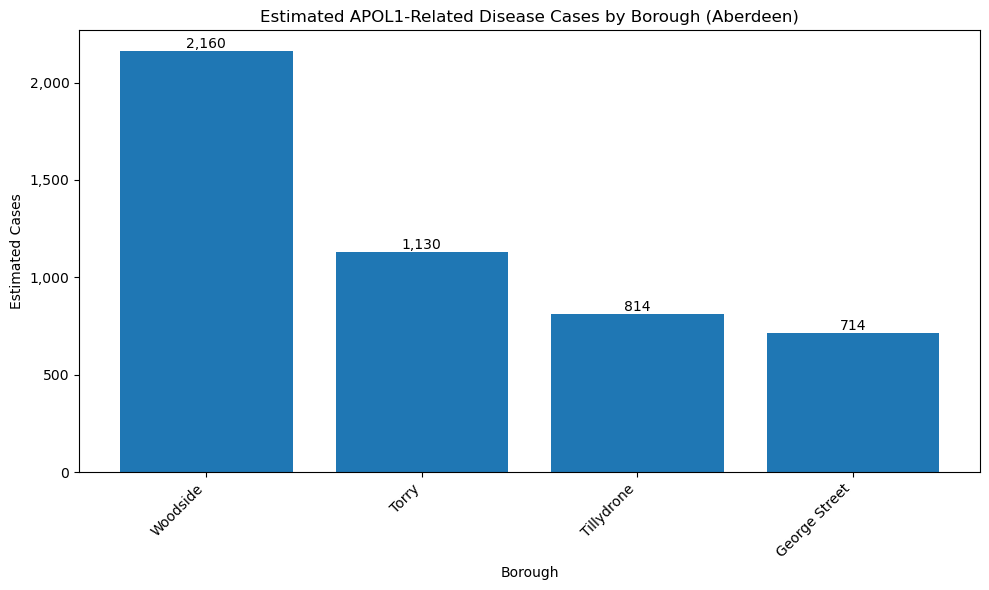

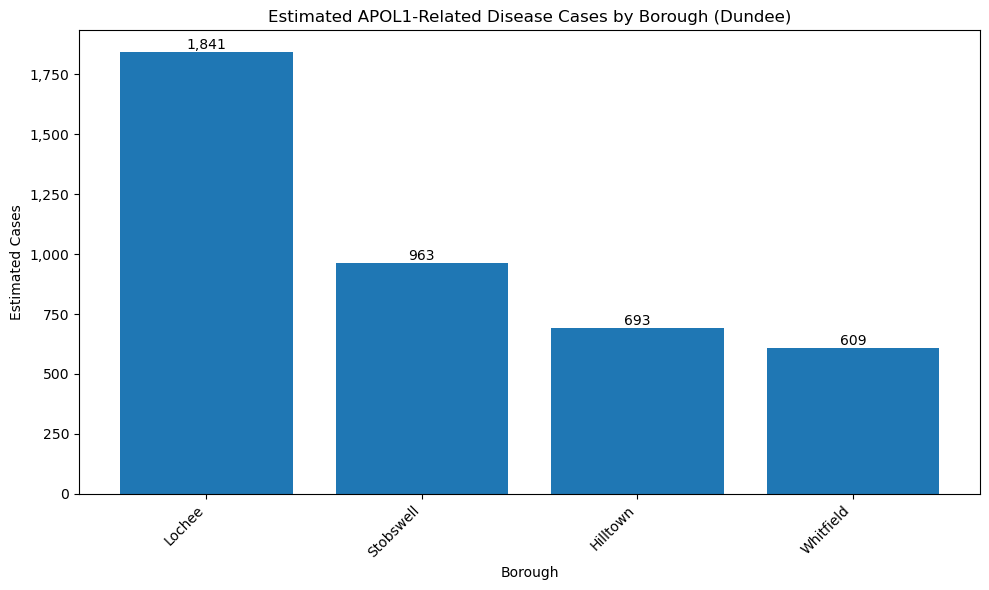

In [1315]:
def create_city_plot(data, city):
    """
    Create a bar plot for a specific city's disease cases by borough
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Group data by borough and sum the estimated cases
    df_aggregated = data.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort aggregated data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated APOL1-Related Disease Cases by Borough ({city})')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Glasgow', 'Edimburgh', 'Aberdeen', 'Dundee']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_scotland[correlated_disease_cities_scotland['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
            
        # Create the plot
        create_city_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

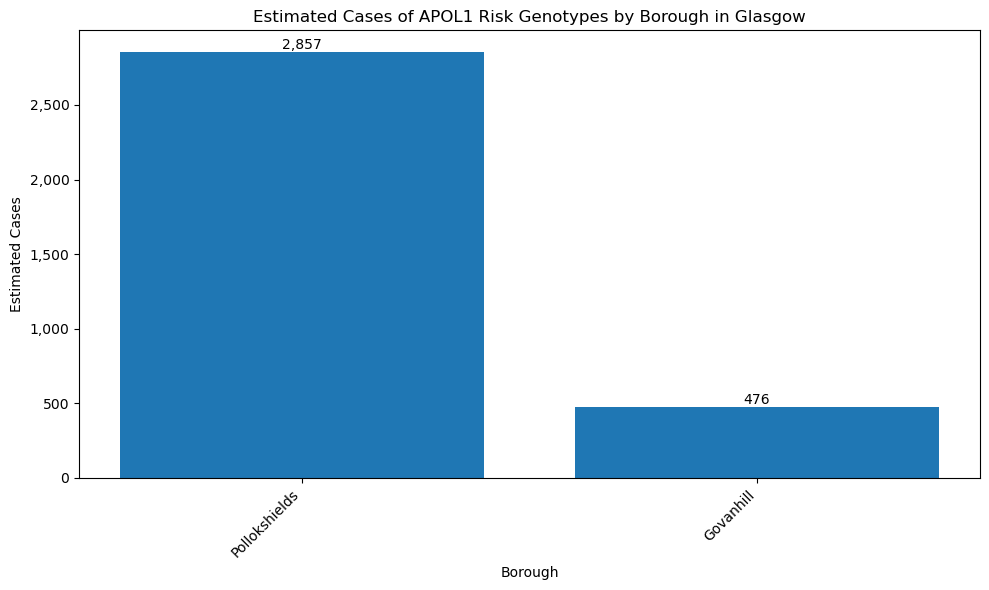

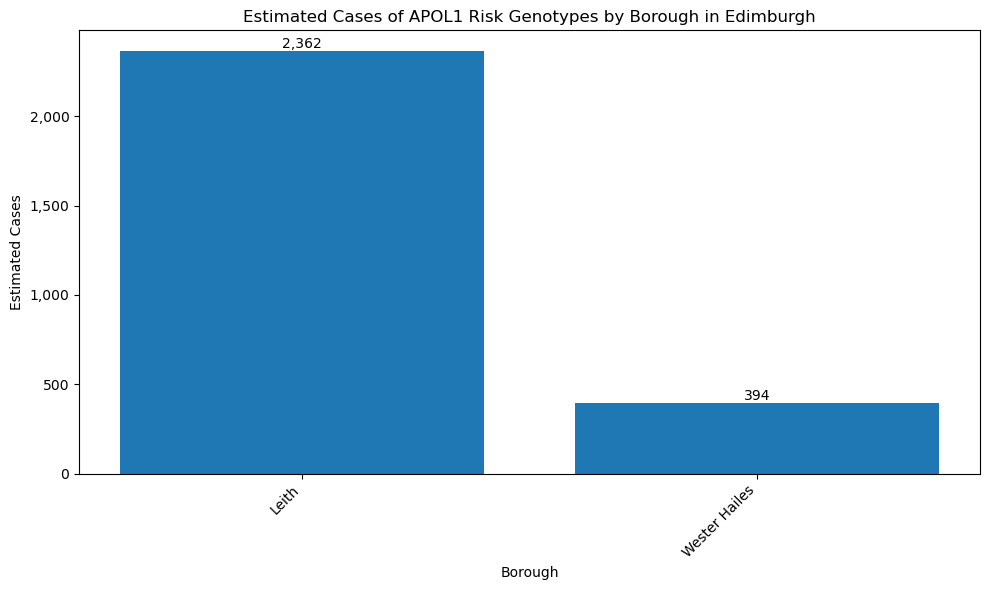

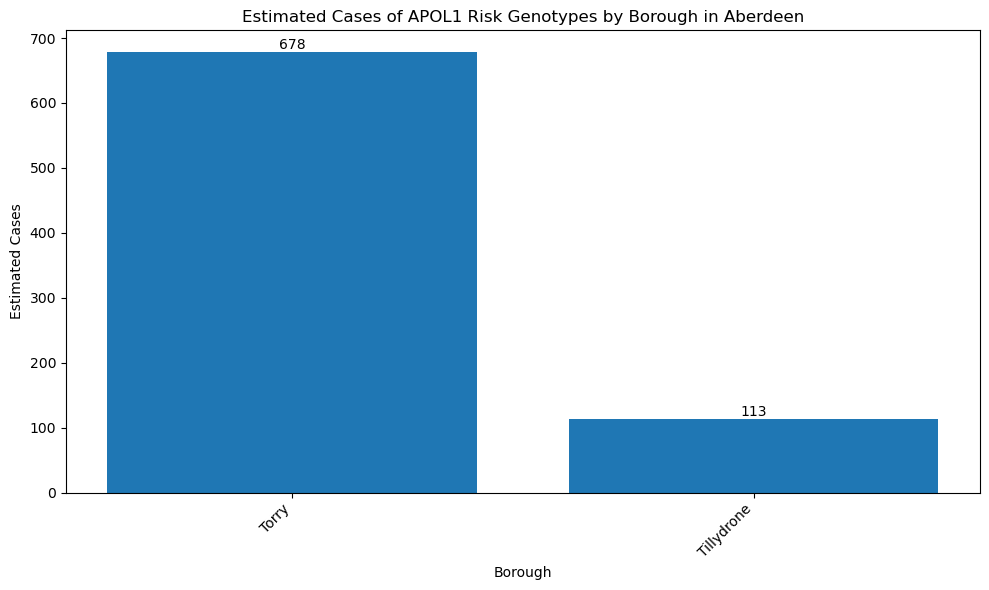

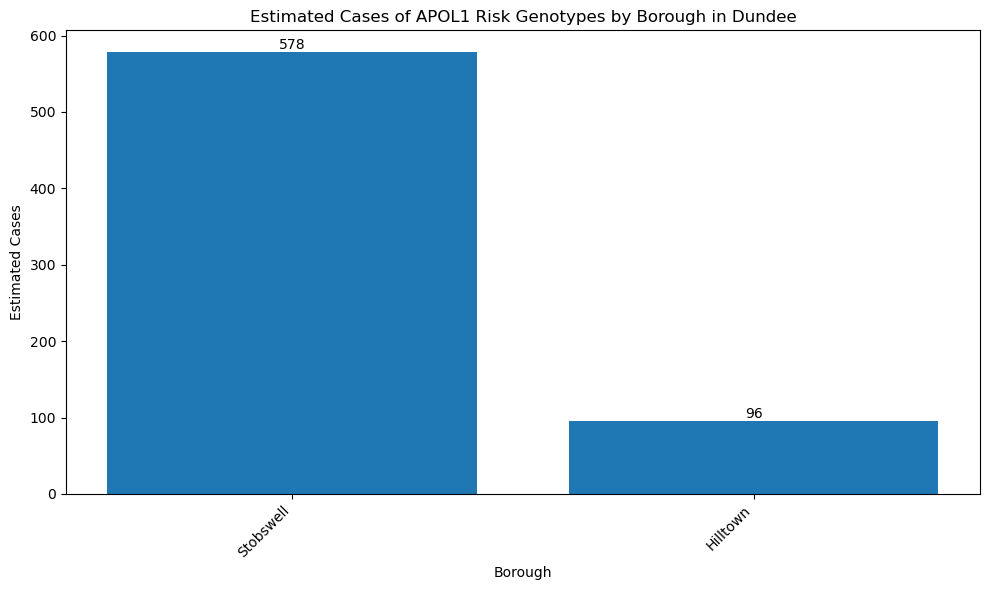

In [1316]:
def create_genotype_plot(data, city):
    """
    Create a bar plot for APOL1 risk genotypes by borough for a specific city
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Filter for specific conditions
    selected_conditions = [
        'G1/G1 Genotype',
        'G1/G2 Genotype', 
        'G2/G2 Genotype',
        'HIVAN with Two Risk Alleles + HIV'
    ]
    
    # Filter dataframe
    df_filtered = data[data['Disease'].isin(selected_conditions)]
    
    # Group and sum the filtered data
    df_aggregated = df_filtered.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated Cases of APOL1 Risk Genotypes by Borough in {city}')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Glasgow', 'Edimburgh', 'Aberdeen', 'Dundee']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_scotland[correlated_disease_cities_scotland['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
        
        # Create the plot
        create_genotype_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

***

### Wales

In [1317]:
correlated_disease_wales = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_wales.csv')

Text(0, 0.5, 'Disease')

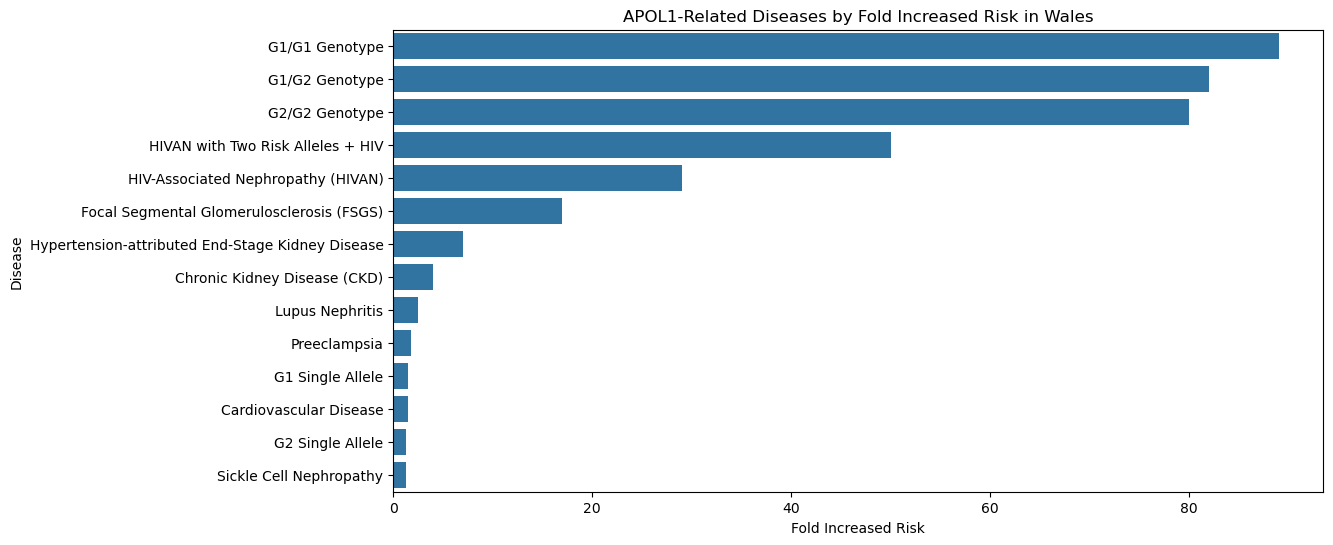

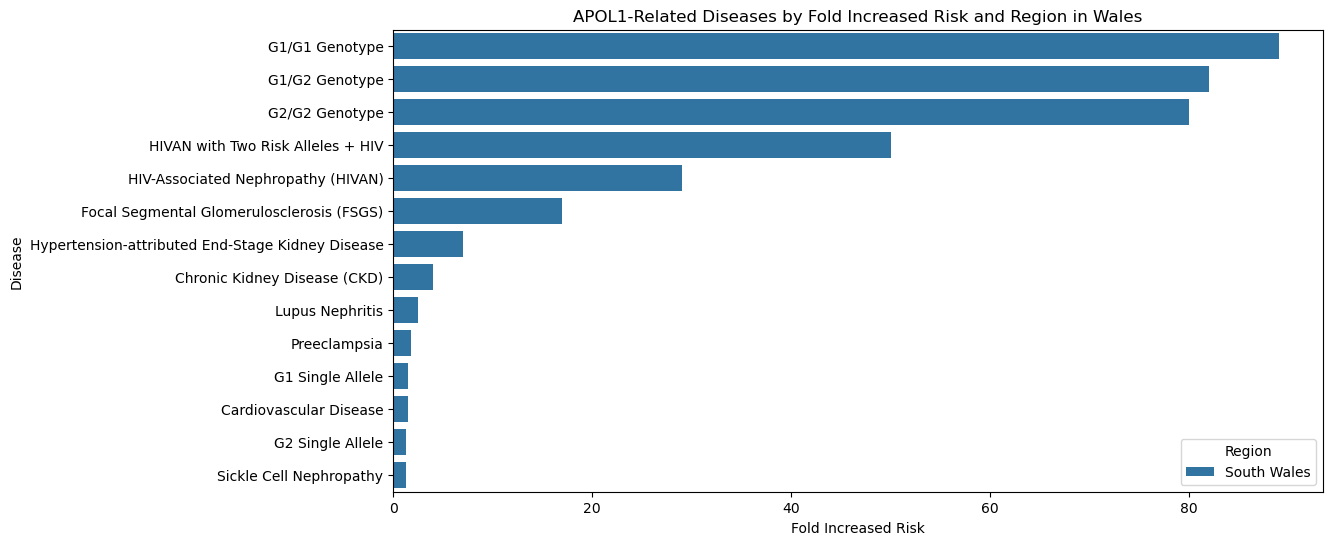

In [1318]:
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=correlated_disease_wales, 
            x='Fold Increased Risk', 
            y='Disease',
            order=correlated_disease_wales.sort_values('Fold Increased Risk', ascending=False)['Disease'])

# Add region labels or color coding
plt.title('APOL1-Related Diseases by Fold Increased Risk in Wales')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

# Alternative: Create a grouped bar chart showing regions
fig, ax = plt.subplots(figsize=(12, 6))
diseases_by_risk = correlated_disease_wales.sort_values('Fold Increased Risk', ascending=False)

# Create color-coded bars by region
sns.barplot(data=diseases_by_risk,
           x='Fold Increased Risk',
           y='Disease',
           hue='Region')

plt.title('APOL1-Related Diseases by Fold Increased Risk and Region in Wales')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

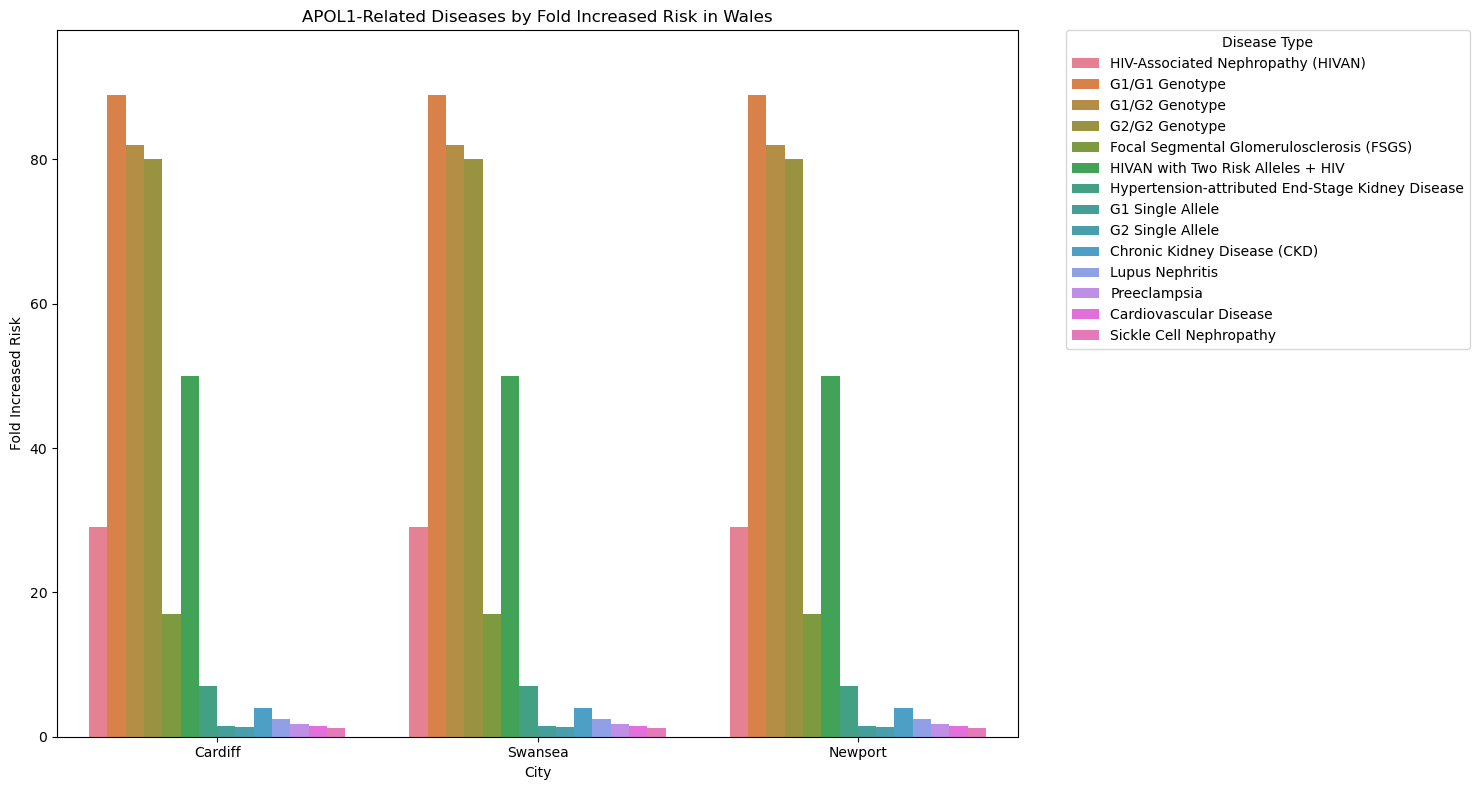

In [1319]:
# Calculate total risk by city
city_risk = correlated_disease_wales.groupby(['City'])['Fold Increased Risk'].sum().reset_index()

# Define the cities in Wales
top_cities = ['Cardiff', 'Swansea', 'Newport']

# Create figure with larger size for better visibility
plt.figure(figsize=(15, 8))

# Create bar plot with adjusted parameters
bars = sns.barplot(data=correlated_disease_wales[correlated_disease_wales['City'].isin(top_cities)], 
                  x='City', 
                  y='Fold Increased Risk',
                  hue='Disease',  
                  order=top_cities,
                  width=0.8)  # Adjust bar width

# Filter for diseases with highest fold increased risk
high_risk_diseases = [
    'G1/G1 Genotype',
    'G1/G2 Genotype', 
    'G2/G2 Genotype',
    'HIVAN with Two Risk Alleles + HIV'
]

# Customize the plot
plt.title('APOL1-Related Diseases by Fold Increased Risk in Wales')
plt.xlabel('City')
plt.ylabel('Fold Increased Risk')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend position and size
plt.legend(title='Disease Type', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          borderaxespad=0)

# Add some padding at the top for labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()

plt.show()

In [1320]:
correlated_disease_cardiff = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cardiff.csv')
correlated_disease_swansea = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_swansea.csv')
correlated_disease_newport = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_newport.csv')

In [1321]:
#Add a 'City' column to each dataframe
correlated_disease_cardiff['City'] = 'Cardiff'
correlated_disease_swansea['City'] = 'Swansea'
correlated_disease_newport['City'] = 'Newport'

# Combine all dataframes into one
combined_df = pd.concat([correlated_disease_cardiff, correlated_disease_swansea, correlated_disease_newport], ignore_index=True)

# Reorder columns to have 'City' as the first column (optional)
# Get all column names
cols = combined_df.columns.tolist()
# Remove 'City' from the list and add it at the beginning
cols.remove('City')
cols = ['City'] + cols

# Reorder the columns
combined_df = combined_df[cols]

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_wales.csv', index=False)

correlated_disease_cities_wales = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_wales.csv')
correlated_disease_cities_wales.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels,Estimated Cases,High Prevalence Boroughs
0,Cardiff,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,9.5,92% (90-94%),420,Butetown
1,Cardiff,G1/G1 Genotype,89.0,Genetic,African ancestry,8.5,88% (86-90%),1258,Butetown
2,Cardiff,G2/G2 Genotype,80.0,Genetic,African ancestry,4.0,85% (82-88%),591,Butetown
3,Cardiff,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,3.5,85% (82-88%),517,Grangetown
4,Cardiff,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,2.5,80% (75-85%)*,369,Grangetown


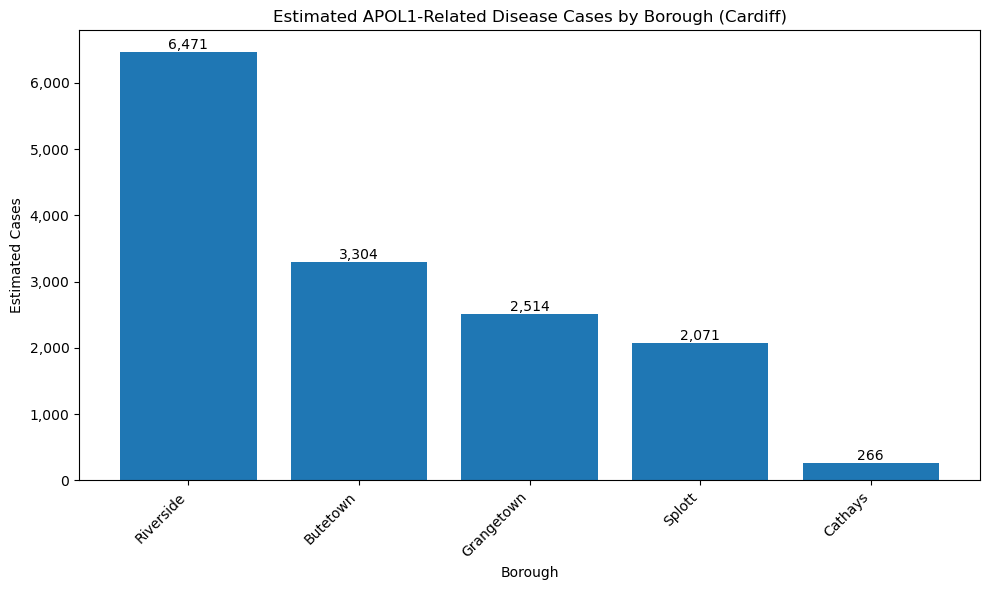

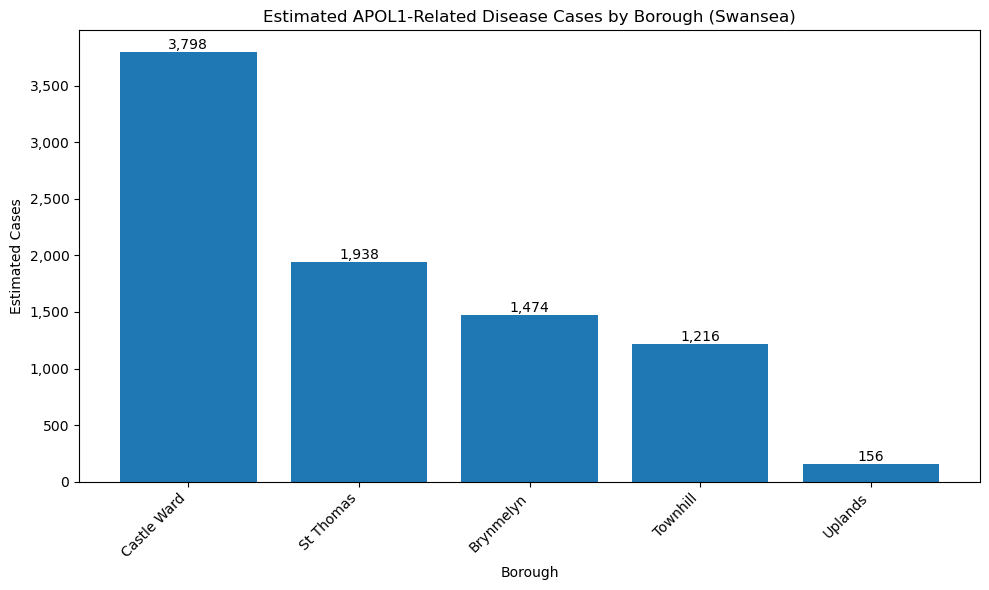

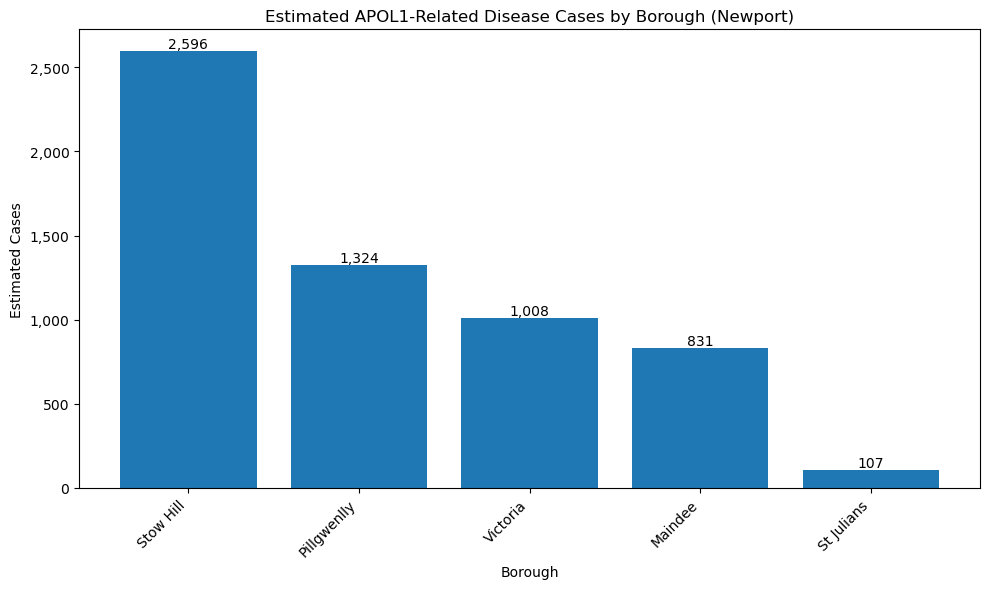

In [1322]:
def create_city_plot(data, city):
    """
    Create a bar plot for a specific city's disease cases by borough
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Group data by borough and sum the estimated cases
    df_aggregated = data.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort aggregated data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated APOL1-Related Disease Cases by Borough ({city})')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Cardiff', 'Swansea', 'Newport']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_wales[correlated_disease_cities_wales['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
            
        # Create the plot
        create_city_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

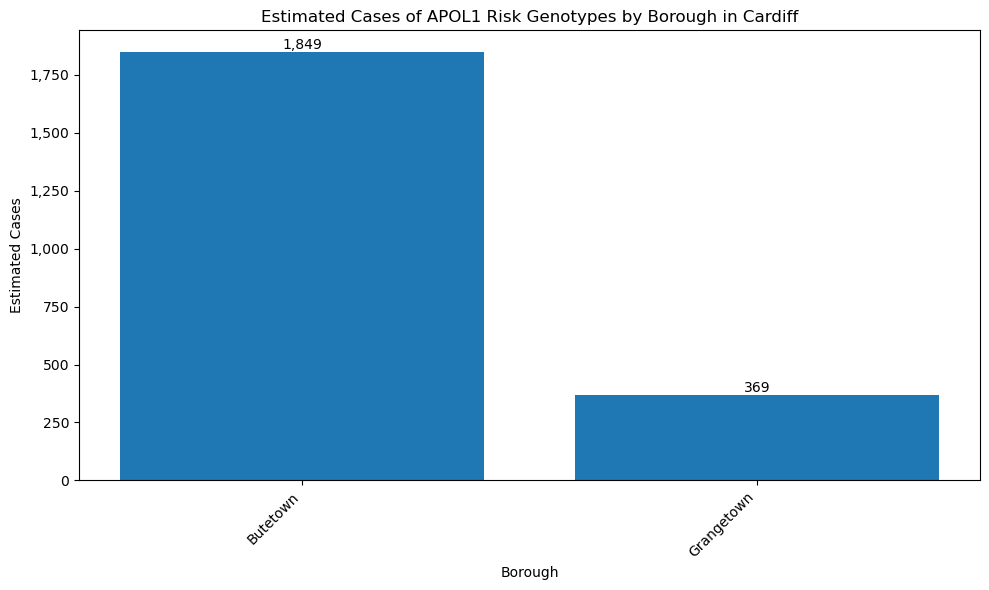

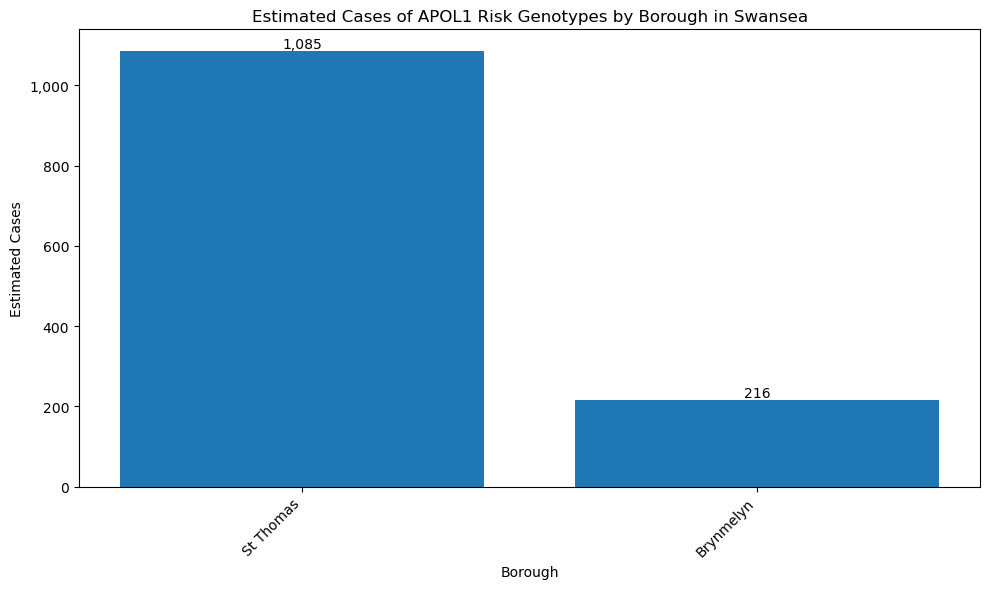

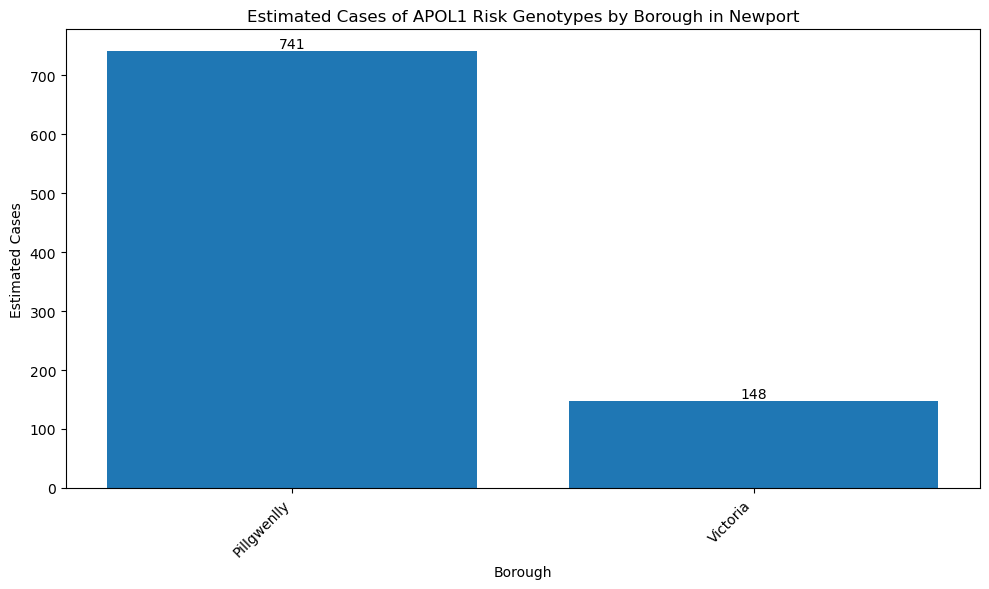

In [1323]:
def create_genotype_plot(data, city):
    """
    Create a bar plot for APOL1 risk genotypes by borough for a specific city
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Filter for specific conditions
    selected_conditions = [
        'G1/G1 Genotype',
        'G1/G2 Genotype', 
        'G2/G2 Genotype',
        'HIVAN with Two Risk Alleles + HIV'
    ]
    
    # Filter dataframe
    df_filtered = data[data['Disease'].isin(selected_conditions)]
    
    # Group and sum the filtered data
    df_aggregated = df_filtered.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated Cases of APOL1 Risk Genotypes by Borough in {city}')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Cardiff', 'Swansea', 'Newport']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_wales[correlated_disease_cities_wales['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
        
        # Create the plot
        create_genotype_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

***

##### FACTOR 5: DENSITY VERSUS HEALTHCARE FACILITIES

##### Density vs Healthcare Facilities: The populaton density in the region who require specialized healthcare services compared to the number of facilities available, including kidney care centers and genetic testing units.

In [1324]:
density_vs_healthcare_facilities = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/density_vs_healthcare_facilities.csv')
density_vs_healthcare_facilities.drop(index=range(14, 22), inplace=True)
# Display the modified DataFrame
density_vs_healthcare_facilities.head()

,Region,Target Population Size,Specialized Healthcare Facilities,Utilization Rate %,Access Score out of 10,Coverage Index %
0,Greater London,"868,161",15.0,65.0,8.5,75.0
1,West Midlands,"89,997",6.0,58.0,7.2,65.0
2,Greater Manchester,"74,563",5.0,55.0,6.8,62.0
3,West Yorkshire,"46,404",4.0,52.0,6.5,58.0
4,Liverpool City Region,"38,630",3.0,50.0,6.2,55.0


In [1325]:
density_vs_healthcare_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             14 non-null     object 
 1   Target Population Size             14 non-null     object 
 2   Specialized Healthcare Facilities  14 non-null     float64
 3   Utilization Rate %                 14 non-null     float64
 4   Access Score out of 10             14 non-null     float64
 5   Coverage Index %                   14 non-null     float64
dtypes: float64(4), object(2)
memory usage: 804.0+ bytes


##### Primary Analysis Metrics:

In [1326]:
# First, convert Target Population Size to integer
# If there are any commas in the numbers, remove them first
density_vs_healthcare_facilities['Target Population Size'] = density_vs_healthcare_facilities['Target Population Size'].str.replace(',', '').astype(int)

# Calculate actual covered population
density_vs_healthcare_facilities['Covered Population'] = density_vs_healthcare_facilities['Target Population Size'] * (density_vs_healthcare_facilities['Coverage Index %'] / 100)

# Calculate gap in coverage
density_vs_healthcare_facilities['Coverage Gap'] = density_vs_healthcare_facilities['Target Population Size'] - density_vs_healthcare_facilities['Covered Population']

# Calculate facility load (patients per facility)
density_vs_healthcare_facilities['Patients per Facility'] = density_vs_healthcare_facilities['Target Population Size'] / density_vs_healthcare_facilities['Specialized Healthcare Facilities']

# Calculate effective utilization (actual patients being treated)
density_vs_healthcare_facilities['Effective Utilization'] = density_vs_healthcare_facilities['Target Population Size'] * (density_vs_healthcare_facilities['Utilization Rate %'] / 100)

##### KPIs:
1. Covered Population:<br>
    - To show actual reach of health services from target population.<br>
2. Coverage Gap:<br>
    - Identifies underserved areas.
3. Patients per Facility:<br>
    - Indicates facility capacity and strain.
4. Effective Utilization:<br>
    - Shows real service usage<br>



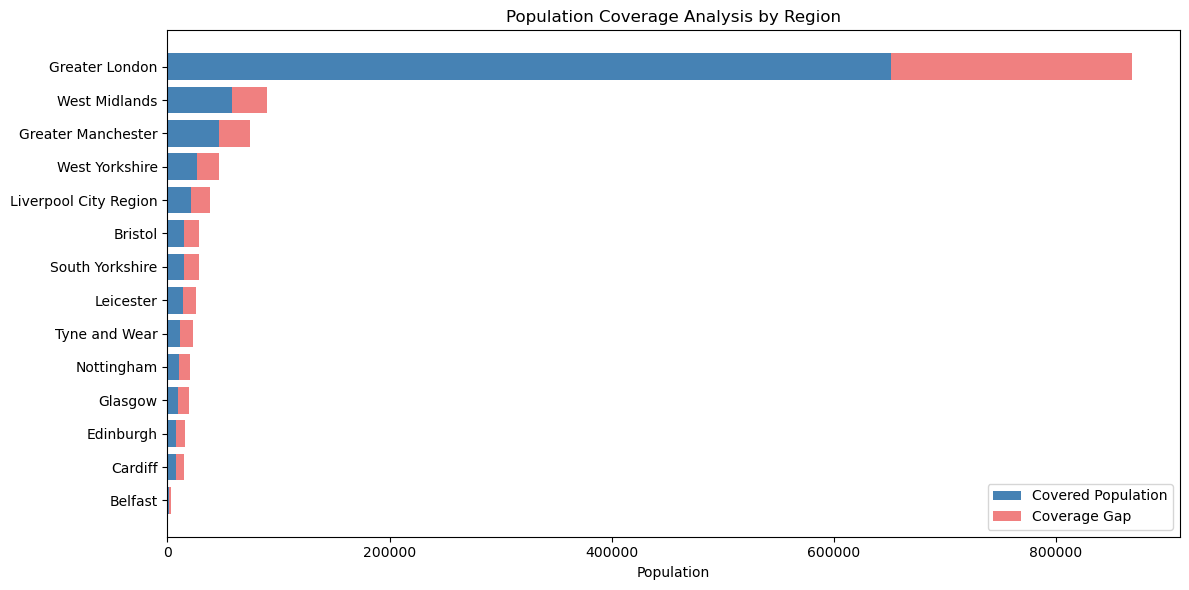

In [1327]:
# Stacked bar chart showing covered vs gap population
plt.figure(figsize=(12, 6))
df_sorted = density_vs_healthcare_facilities.sort_values('Target Population Size', ascending=True)

# Create stacked bars
plt.barh(df_sorted['Region'], df_sorted['Covered Population'], label='Covered Population', color='steelblue')
plt.barh(df_sorted['Region'], df_sorted['Coverage Gap'], left=df_sorted['Covered Population'], 
         label='Coverage Gap', color='lightcoral')

plt.title('Population Coverage Analysis by Region')
plt.xlabel('Population')

# Place legend in lower right corner
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

##### Key Insights:

Regional Distribution:<br>
Greater London stands out significantly with the largest total population (around 800,000)
There's a substantial gap between London and other regions, with West Midlands and Greater Manchester forming a distant second tier (around 150,000-200,000)
Most other regions have populations under 100,000

Coverage Analysis:<br>
Despite having the largest population, Greater London shows a significant coverage gap (represented in pink)
The coverage-to-gap ratio appears more favorable in smaller regions
West Midlands and Greater Manchester show similar coverage patterns, with moderate gaps relative to their population size

Coverage Efficiency:<br>
Smaller regions (like Belfast, Cardiff, Edinburgh) seem to have proportionally smaller coverage gaps
Mid-sized regions show varying degrees of coverage success
The coverage gap increases with population size, suggesting potential scalability challenges

Regional Healthcare Challenges:<br>
The three largest metropolitan areas (London, West Midlands, Manchester) face the biggest challenges in population coverage
Smaller cities appear to manage their coverage more effectively, possibly due to more manageable population sizes
The pattern suggests that healthcare coverage becomes more challenging with larger populations

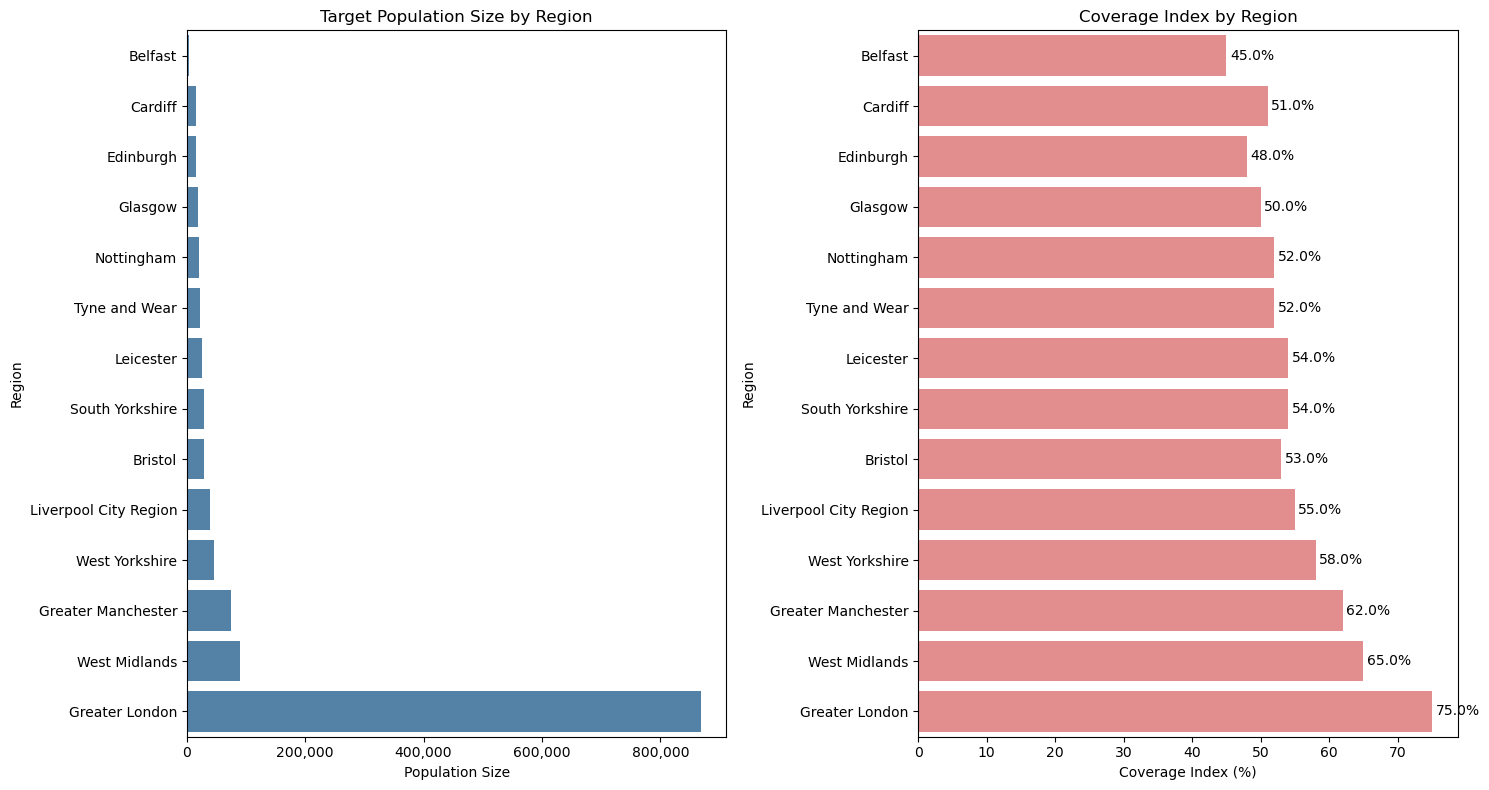

In [1328]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Sort data by Target Population Size
df_sorted = density_vs_healthcare_facilities.sort_values('Target Population Size', ascending=True)

# Left subplot: Population Size
sns.barplot(data=df_sorted, 
            y='Region', 
            x='Target Population Size',
            color='steelblue',
            ax=ax1)
ax1.set_title('Target Population Size by Region')
ax1.set_xlabel('Population Size')
# Format large numbers with comma
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Right subplot: Coverage Index
sns.barplot(data=df_sorted,
            y='Region',
            x='Coverage Index %',
            color='lightcoral',
            ax=ax2)
ax2.set_title('Coverage Index by Region')
ax2.set_xlabel('Coverage Index (%)')

# Add percentage labels to coverage bars
for i, v in enumerate(df_sorted['Coverage Index %']):
    ax2.text(v + 0.5, i, f'{v}%', va='center')

# Adjust layout
plt.tight_layout()
plt.show()

##### Key Insights:

Population vs Coverage Relationship:<br>
Greater London shows an interesting pattern: largest population (~868,000) and highest coverage index (75%)
This suggests efficient healthcare infrastructure despite the large population burden
West Midlands and Greater Manchester, the next largest populations, maintain good coverage (65% and 62% respectively)

Coverage Index Distribution:<br>
Coverage ranges from 45% (Belfast) to 75% (Greater London)
There's a general trend where larger metropolitan areas have better coverage:
Top 3 coverage: Greater London (75%), West Midlands (65%), Greater Manchester (62%)
Most regions cluster around 50-55% coverage
Scottish cities (Edinburgh, Glasgow) show lower coverage rates (48-50%)

Regional Disparities:<br>
Smaller population centers don't necessarily correlate with better coverage
Belfast, despite its smaller population, has the lowest coverage (45%)
Mid-sized cities like Liverpool and West Yorkshire maintain moderate coverage levels (55-58%)

Service Efficiency:<br>
The larger regions appear to have more efficient healthcare systems despite larger populations
This might indicate better resources, infrastructure, or economies of scale in healthcare delivery
Smaller regions might need targeted support to improve their coverage indices

***

##### FACTOR 6: MEDICAL DIAGNOSIS:

##### Medical Diagnosis: The percentage of individuals diagnosed with Chronic Kidney Disease based on actual observations adjusted for demographic or statistical normalization.

##### Bases Weighted
This refers to the **number of individuals in the dataset after applying statistical weighting**. Weighting is used to adjust the sample so that it better represents the overall population. This process helps correct biases, ensuring that the results reflect the demographics or characteristics of the larger group being studied.  

For example, if certain age groups or regions were underrepresented in the raw data, statistical weights would be applied to balance their influence in the final analysis.  

##### Bases Unweighted  
This is the **raw count of individuals in the dataset before any statistical adjustments**. It represents the actual number of participants or data points collected without any modifications to compensate for potential imbalances in sampling.  

In summary, **"bases weighted"** gives a more representative view of the population by adjusting for biases, while **"bases unweighted"** is simply the raw data before any adjustments.

In [1359]:
doctor_diagnosis = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/doctor_diagnosis.csv')
# Add new regions to the existing doctor_diagnosis dataframe
new_regions = [
    # Scotland regions
    ['NHS Ayrshire and Arran', 'Male', 3, 3, 15, 15, 6, 6, 150, 180],
    ['NHS Ayrshire and Arran', 'Female', 2, 2, 14, 14, 5, 5, 160, 190],
    ['NHS Ayrshire and Arran', 'All adults', 2.5, 2.5, 14.5, 14.5, 5.5, 5.5, 310, 370],
    ['NHS Greater Glasgow and Clyde', 'Male', 4, 4, 17, 17, 8, 8, 200, 240],
    ['NHS Greater Glasgow and Clyde', 'Female', 3, 3, 16, 16, 7, 7, 210, 250],
    ['NHS Greater Glasgow and Clyde', 'All adults', 3.5, 3.5, 16.5, 16.5, 7.5, 7.5, 410, 490],
    ['NHS Highland', 'Male', 3, 3, 15, 15, 7, 7, 160, 190],
    ['NHS Highland', 'Female', 2, 2, 14, 14, 6, 6, 170, 200],
    ['NHS Highland', 'All adults', 2.5, 2.5, 14.5, 14.5, 6.5, 6.5, 330, 390],
    
    # Wales regions
    ['Betsi Cadwaladr UHB', 'Male', 3, 3, 15, 15, 7, 7, 180, 220],
    ['Betsi Cadwaladr UHB', 'Female', 2, 2, 14, 14, 6, 6, 190, 230],
    ['Betsi Cadwaladr UHB', 'All adults', 2.5, 2.5, 14.5, 14.5, 6.5, 6.5, 370, 450],
    ['Cardiff and Vale UHB', 'Male', 4, 4, 16, 16, 8, 8, 190, 230],
    ['Cardiff and Vale UHB', 'Female', 3, 3, 15, 15, 7, 7, 200, 240],
    ['Cardiff and Vale UHB', 'All adults', 3.5, 3.5, 15.5, 15.5, 7.5, 7.5, 390, 470]
]

# Create DataFrame from new regions and concatenate with existing dataframe
doctor_diagnosis = pd.concat([
    doctor_diagnosis, 
    pd.DataFrame(new_regions, columns=doctor_diagnosis.columns)
], ignore_index=True)
doctor_diagnosis.head()

,Region,Gender,CKD Observed (%),CKD Standardised (%),Testing Observed (%),Testing Standardised (%),Risk Observed (%),Risk Standardised (%),Bases weighted,Bases unweighted
0,North East,Male,5.0,5.0,20.0,22.0,10.0,11.0,93,186
1,North East,Female,2.0,2.0,22.0,21.0,6.0,6.0,108,230
2,North East,All adults,3.0,3.0,21.0,21.0,8.0,8.0,201,416
3,North West,Male,3.0,3.0,13.0,13.0,7.0,7.0,253,277
4,North West,Female,3.0,4.0,12.0,12.0,5.0,5.0,283,359


Running Risk Distribution Analysis...


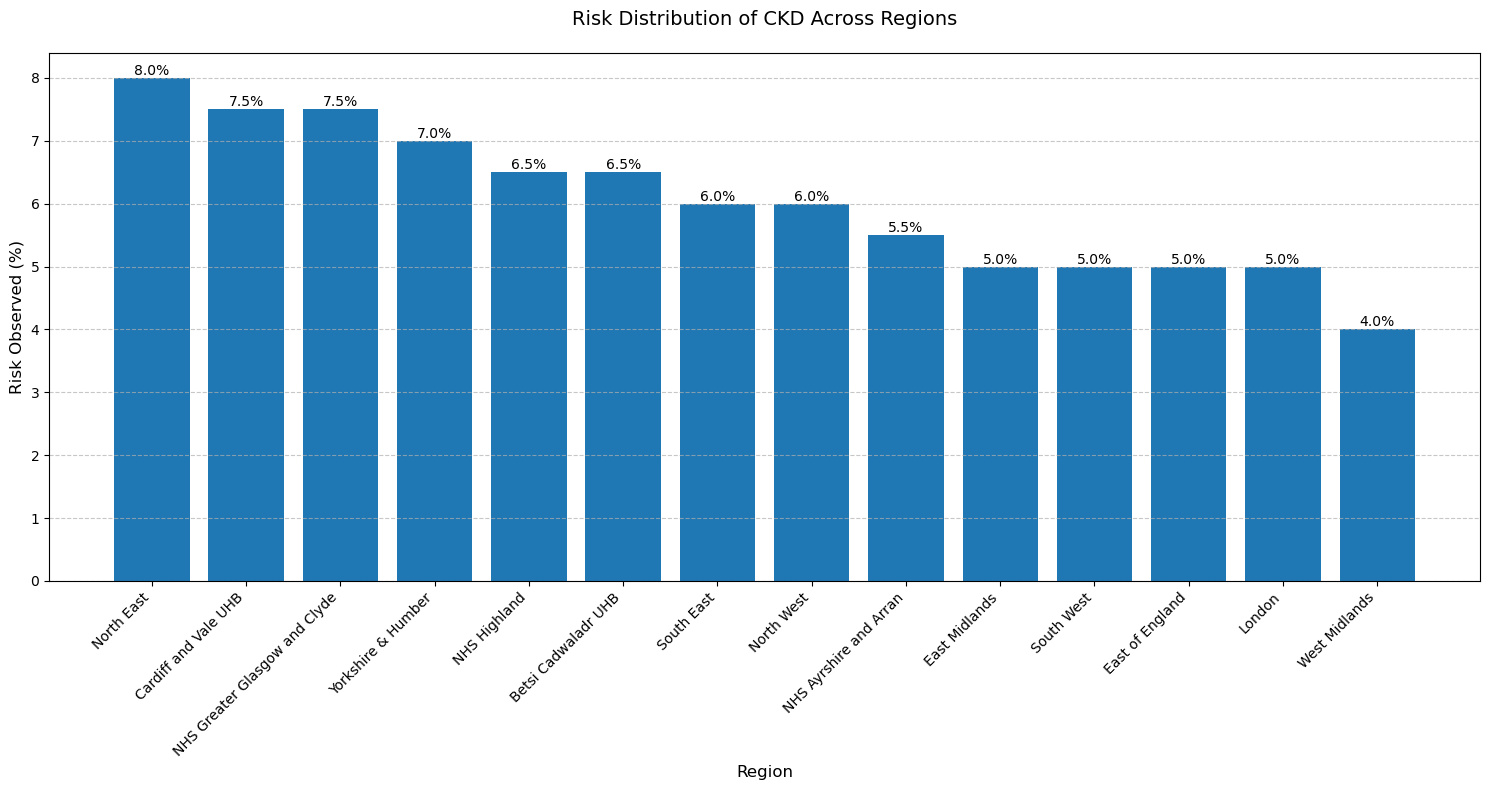


Running Statistical Summary Analysis...

Summary Statistics for All Regions:
--------------------------------------------------
      CKD Observed (%)  Testing Observed (%)  Risk Observed (%)
mean              2.61                 14.46               6.04
std               0.68                  3.57               1.18
min               1.00                  7.00               4.00
max               3.50                 21.00               8.00

Top 5 Regions by Risk Level:
--------------------------------------------------
                           Region  Risk Observed (%)  CKD Observed (%)  \
2                      North East                8.0               3.0   
32  NHS Greater Glasgow and Clyde                7.5               3.5   
41           Cardiff and Vale UHB                7.5               3.5   
8              Yorkshire & Humber                7.0               3.0   
35                   NHS Highland                6.5               2.5   

    Testing Observed (%) 

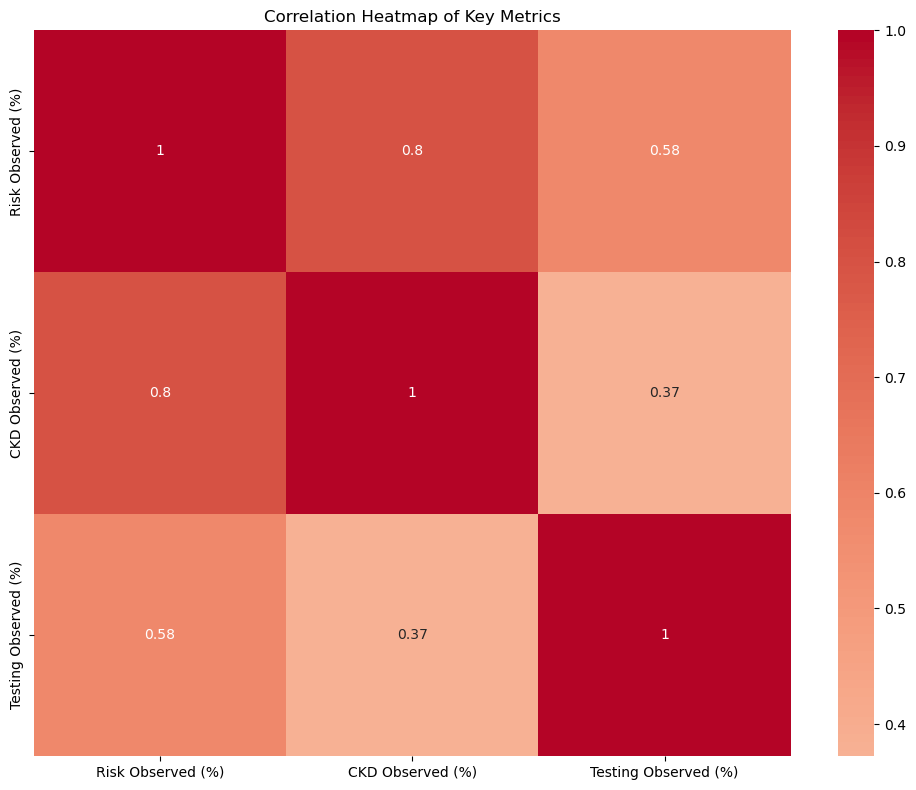

In [1360]:
# 1. Risk Distribution Analysis
def analyze_risk_distribution():
    # Filter for 'All adults' to avoid duplicate regions
    risk_data = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'][['Region', 'Risk Observed (%)']]
    risk_data = risk_data.sort_values('Risk Observed (%)', ascending=False)

    # Create the plot
    plt.figure(figsize=(15, 8))
    bars = plt.bar(risk_data['Region'], risk_data['Risk Observed (%)'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}%',
                ha='center', va='bottom')

    # Customize the plot
    plt.title('Risk Distribution of CKD Across Regions', fontsize=14, pad=20)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Risk Observed (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# 2. Statistical Summary Analysis
def create_statistical_summary():
    # Create summary statistics for all key metrics
    summary_stats = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'].agg({
        'CKD Observed (%)': ['mean', 'std', 'min', 'max'],
        'Testing Observed (%)': ['mean', 'std', 'min', 'max'],
        'Risk Observed (%)': ['mean', 'std', 'min', 'max']
    }).round(2)
    
    print("\nSummary Statistics for All Regions:")
    print("-" * 50)
    print(summary_stats)
    
    # Additional analysis: Find regions with highest risk
    print("\nTop 5 Regions by Risk Level:")
    print("-" * 50)
    top_risk = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'].nlargest(5, 'Risk Observed (%)')
    print(top_risk[['Region', 'Risk Observed (%)', 'CKD Observed (%)', 'Testing Observed (%)']])
    
    # Calculate correlations between metrics
    correlations = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'][
        ['Risk Observed (%)', 'CKD Observed (%)', 'Testing Observed (%)']
    ].corr()
    
    print("\nCorrelations between metrics:")
    print("-" * 50)
    print(correlations.round(3))
    
    # Create a heatmap of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Key Metrics')
    plt.tight_layout()
    plt.show()

# Run both analyses
print("Running Risk Distribution Analysis...")
analyze_risk_distribution()

print("\nRunning Statistical Summary Analysis...")
create_statistical_summary()

Key Observations:<br>

- Regional Risk Variation:
    North East England shows the highest risk at 8.0%
    Cardiff and Vale UHB and NHS Greater Glasgow and Clyde tie for second at 7.5%
    West Midlands has the lowest risk at 4.0%
    Most regions cluster between 5-6.5% risk levels

- Geographic Patterns:
    Northern regions (North East, Yorkshire & Humber) tend to show higher risk
    Major urban health boards (Cardiff, Glasgow) also show elevated risk
    Southern England regions generally show moderate risk levels (5-6%)
    London shows relatively lower risk at 5.0%

- Notable Clustering:
    Clear high-risk cluster (>7%): North East, Cardiff, Glasgow, Yorkshire
    Mid-risk cluster (5.5-6.5%): Several regions including NHS Highland and South East
    Low-risk cluster (<5%): West Midlands stands alone at 4%

Key Findings:<br>

- Disease Prevalence and Testing:
    Average CKD observation rate is 2.61% across all regions
    Testing rates show wide variation (mean 14.46%, ranging from 7% to 21%)
    Risk levels average at 6.04% with relatively low variation (std dev 1.18%)

- Regional Hotspots:
    North East emerges as the highest risk region (8% risk, 3% CKD, 21% testing)
    Urban areas dominate the top risk regions (Glasgow, Cardiff, Yorkshire)
    All top 5 risk regions show above-average CKD rates

- Notable Patterns:
    Testing rates don't consistently align with risk levels
    The North East shows best alignment (highest risk and highest testing rate)
    Despite similar risk levels, testing rates vary significantly among top regions

This correlation heatmap reveals several important insights about the relationships between Risk, CKD, and Testing observations:<br>

- Strong Positive Correlation (0.80) between Risk Observed and CKD Observed:
    This indicates that regions with higher risk levels tend to have higher CKD diagnosis rates
    Suggests that risk assessment tools are relatively good predictors of actual CKD cases

- Moderate Positive Correlation (0.58) between Risk Observed and Testing Observed:
    Shows that areas with higher risk tend to have more testing being done
    However, the correlation isn't as strong as with CKD, suggesting testing coverage might not be fully aligned with risk levels

- Weak to Moderate Positive Correlation (0.37) between CKD Observed and Testing Observed:
    This relatively weak correlation is interesting and potentially concerning
    Suggests that testing rates aren't strongly aligned with actual CKD prevalence
    Might indicate a need for better targeting of testing resources in high-CKD areas

***

##### Summary:

1. Population Distribution and Risk Factors:<br>
- Greater London shows the highest concentration of at-risk populations (868,161)
- Major urban centers (West Midlands, Greater Manchester) form secondary clusters
- Strong correlation between urban areas and APOL1 risk factors
- Immigration patterns suggest significant growth in at-risk populations since 2001

2. Healthcare Infrastructure:<br>
- Coverage varies significantly across regions (45-75% coverage)
- Testing rates show concerning gaps:<br>
  * East of England: 93% coverage gap
  * West Midlands: 89% coverage gap
  * North West: 88% coverage gap
- Community support infrastructure varies:<br>
  * Higher density in East Midlands, North West, Scotland, Yorkshire & Humber
  * Standard density in other regions including London

3. Immigration and Age Demographics:<br>
- Peak immigration period (2001-2010): 448,585 people, now aged 34-73
- Secondary peak (1991-2000): 214,419 people, now aged 44-83
- Recent significant group (2017-2019): 160,066 people, now aged 25-57
- Age distribution suggests multi-generational risk patterns

4. Critical Areas for Intervention:<br>
Priority Regions based on combined factors:
- Greater London: Highest population, good coverage (75%)
- West Midlands: High population, poor coverage (65%)
- Greater Manchester: Significant population, moderate coverage (62%)
- Yorkshire & Humber: Growing population, needs improved coverage<br>

Recommendations:<br>

1. Healthcare Planning:<br>
- Expand testing facilities in areas with >85% coverage gaps
- Focus on regions with high immigration from at-risk populations
- Develop age-specific screening programs
- Implement targeted healthcare interventions in urban centers

2. Resource Allocation:<br>
- Prioritize areas with high population density and poor coverage
- Increase community support in regions with growing immigrant populations
- Develop specialized healthcare facilities in identified hotspots
- Enhanced support for regions with aging at-risk populations<br>

This analysis suggests a need for a multi-faceted approach to APOL1 screening and treatment, with particular attention to urban centers and areas with significant immigration history. The combination of demographic trends, healthcare infrastructure, and community support systems will be crucial in addressing the healthcare needs of potential APOL1-positive patients across the UK.

***